# Violence Against Women

### Table of Contents
1. [Set Up](#Set+Up)
2. [Data Selection](#Data_Selection)
3. [Preprocessing](#Preprocessing)
4. [Transformations](#Transformations)
    1. [Encodings](#Encodings)
    2. [Remove Highly Correlated Features](#Remove_Highly_Correlated_Features)
    3. [Split Datasetd](#Split_Datasetd)
    4. [Remove Outliers](#Remove_Outliers)
    5. [Impute](#Impute)
    5. [Scale](#Scale)
    5. [P.C.A.](#P.C.A.)
5. [Data Mining](#Data_Mining)
    1. [Logistic Regression](#Logistic_Regression)
    2. [k-Nearest Neighbors](#k-Nearest_Neighbors)
    3. [Disicion Tree](#Disicion_Tree)
    4. [Support Vector Machine](#Support_Vector_Machine)
    5. [Random Forest](#Random_Forest)
    6. [XGBoosting](#XGBoosting)
6. [Evaluation-Interpretation](#Evaluation-Interpretation)
7. [Prediction](#Prediction)
    1. [Merge All Three SubDatasets Back to One](#Merge_All_Three_SubDatasets_Back_to_One)
    2. [Save New Dataset as .csv](#Save_New_Dataset_as_.csv)

## Set_Up

In [174]:
# Imports
# basics
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) #For showing all the columns on the graphs

# plots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# cross validation
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [175]:
vaw_v1 = pd.read_csv('VAW.csv')

In [176]:
vaw_v1 # first look!

,DATAFLOW,FREQ: Frequency,TIME_PERIOD: Time,GEO_PICT: Pacific Island Countries and territories,TOPIC: Topic,INDICATOR: Indicator,SEX: Sex,AGE: Age,CONDITION: Women’s condition,VIOLENCE_TYPE: Type of violence,PERPETRATOR: Perpetrator,ACTUALITY: Actuality,LIFEPER: Period of life,OUTCOME: Outcome,RESPONSE: Response,HELP_REASON: Reason for searching help,HELP_PROVIDER: Help provider,OBS_VALUE,UNIT_MEASURE: Unit of measure,UNIT_MULT: Unit multiplier,OBS_STATUS: Observation Status,DATA_SOURCE: Data source,OBS_COMMENT: Comment
0,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,CONT_ECON: At least one act of economic abusive,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,6.2,PERCENT: percent,NaN,NaN,FHSS,NaN
1,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,PARTNER: Partner,ALO12M: At least once in the past 12 months,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,9.6,PERCENT: percent,NaN,NaN,FHSS,NaN
2,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,PARTNER: Partner,ALOLIFE: At least once in their lifetime,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,26.7,PERCENT: percent,NaN,NaN,FHSS,NaN
3,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,PARTNER: Partner,ALO12M: At least once in the past 12 months,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,6.7,PERCENT: percent,NaN,NaN,FHSS,NaN
4,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,PARTNER: Partner,ALOLIFE: At least once in their lifetime,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,30.2,PERCENT: percent,NaN,NaN,FHSS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,SPC:DF_VAW(1.0),A: Annual,2006,WS: Samoa,VAW_TOPIC_018: Reasons for seeking help,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,_T: Any,_T: Any,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,ECOURAGED: Encouraged by friends/family,_T: Any,NaN,PERCENT: percent,NaN,O: Missing value,FHSS,Women 15-49.
2012,SPC:DF_VAW(1.0),A: Annual,2006,WS: Samoa,VAW_TOPIC_018: Reasons for seeking help,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,_T: Any,_T: Any,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,INJURED: Badly injured,_T: Any,4.1,PERCENT: percent,NaN,NaN,FHSS,Women 15-49.
2013,SPC:DF_VAW(1.0),A: Annual,2006,WS: Samoa,VAW_TOPIC_018: Reasons for seeking help,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,_T: Any,_T: Any,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,NOMORE: Could not endure more violence,_T: Any,10.0,PERCENT: percent,NaN,NaN,FHSS,Women 15-49.
2014,SPC:DF_VAW(1.0),A: Annual,2006,WS: Samoa,VAW_TOPIC_018: Reasons for seeking help,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,_T: Any,_T: Any,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,THRCHILD: Threatened or hit children,_T: Any,0.2,PERCENT: percent,NaN,NaN,FHSS,Women 15-49.


In [177]:
column_names = ['Dataflow','Frequency','Time','Country_Code','Topic',
                'Indicator','Sex','Age','Condition','Violence_Type',
                'Perpetrator','Actuality','Life_Period','Outcome',
                'Response','Help_Reason','Help_Provider',
                'Observation_Value','Measure_Unit','Unit_Multiplier',
                'Observation_Status','Data_Source','Comment'
               ]

vaw_v1.columns = column_names

## Data_Selection

In [178]:
# Checking the dtypes
vaw_v1.dtypes

Dataflow               object
Frequency              object
Time                    int64
Country_Code           object
Topic                  object
Indicator              object
Sex                    object
Age                    object
Condition              object
Violence_Type          object
Perpetrator            object
Actuality              object
Life_Period            object
Outcome                object
Response               object
Help_Reason            object
Help_Provider          object
Observation_Value     float64
Measure_Unit           object
Unit_Multiplier       float64
Observation_Status     object
Data_Source            object
Comment                object
dtype: object

In [179]:
# Are there any NaN's?
vaw_v1.isna().sum()

Dataflow                 0
Frequency                0
Time                     0
Country_Code             0
Topic                    0
Indicator                0
Sex                      0
Age                      0
Condition                0
Violence_Type            0
Perpetrator              0
Actuality                0
Life_Period              0
Outcome                  0
Response                 0
Help_Reason              0
Help_Provider            0
Observation_Value      782
Measure_Unit             0
Unit_Multiplier       2016
Observation_Status    1253
Data_Source              0
Comment               1003
dtype: int64

"Unit_Multiplier" feature contains only NaN's

In [180]:
# Check for columns with a single value all with missing values etc.
for column in vaw_v1.columns:
    print(f'{column}: {len(vaw_v1[column].unique())}')
    print(vaw_v1[column].unique())

Dataflow: 1
['SPC:DF_VAW(1.0)']
Frequency: 1
['A: Annual']
Time: 10
[2013 2011 2014 2010 2019 2007 2012 2018 2009 2006]
Country_Code: 13
['CK: Cook Islands' 'FJ: Fiji' 'FM: Micronesia (Federated States of)'
 'KI: Kiribati' 'MH: Marshall Islands' 'NR: Nauru' 'PG: Papua New Guinea'
 'PW: Palau' 'SB: Solomon Islands' 'TO: Tonga' 'TV: Tuvalu' 'VU: Vanuatu'
 'WS: Samoa']
Topic: 18
['VAW_TOPIC_001: Types of violence against women by partner'
 'VAW_TOPIC_002: Partner Physical violence by severity'
 'VAW_TOPIC_003: Act of physical violence by partners'
 'VAW_TOPIC_004: Acts of sexual violence by partners'
 'VAW_TOPIC_005: Acts of emotional  violence by partners'
 'VAW_TOPIC_006: Acts of controlling behaviours by partners'
 'VAW_TOPIC_007: Types of violence against women by others (non-partners)'
 'VAW_TOPIC_008: Non-Partner Physical violence by type of perpetrator'
 'VAW_TOPIC_009: Non-Partner Sexual violence by type of perpetrator'
 'VAW_TOPIC_010: Child sexual abuse prevalence by type of per

In [181]:
# Drop all columns that include only one value (=> no extra informwtion for the models)
columns_to_drop = ['Dataflow', # all values -> "SPC:DF_VAW(1.0)"
                   'Frequency', # all values -> "A: Annual"
                   'Indicator', # all values -> "NUMPERRF: Number of persons in relative frequency"
                   'Sex', # all values -> "F: Female"
                   'Measure_Unit', # all values -> "PERCENT: percent"
                   'Unit_Multiplier', # all values -> nan
                   'Observation_Status', # all values -> nan, "O: Missing value"
                  ]

vaw_v2 = vaw_v1.drop(columns_to_drop, axis=1)
vaw_v2

,Time,Country_Code,Topic,Age,Condition,Violence_Type,Perpetrator,Actuality,Life_Period,Outcome,Response,Help_Reason,Help_Provider,Observation_Value,Data_Source,Comment
0,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,Y15T64: 15-64,EVPART: Ever-partnered,CONT_ECON: At least one act of economic abusive,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,6.2,FHSS,NaN
1,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,PARTNER: Partner,ALO12M: At least once in the past 12 months,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,9.6,FHSS,NaN
2,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,PARTNER: Partner,ALOLIFE: At least once in their lifetime,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,26.7,FHSS,NaN
3,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,PARTNER: Partner,ALO12M: At least once in the past 12 months,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,6.7,FHSS,NaN
4,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,PARTNER: Partner,ALOLIFE: At least once in their lifetime,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,30.2,FHSS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2006,WS: Samoa,VAW_TOPIC_018: Reasons for seeking help,Y15T64: 15-64,_T: Any,_T: Any,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,ECOURAGED: Encouraged by friends/family,_T: Any,NaN,FHSS,Women 15-49.
2012,2006,WS: Samoa,VAW_TOPIC_018: Reasons for seeking help,Y15T64: 15-64,_T: Any,_T: Any,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,INJURED: Badly injured,_T: Any,4.1,FHSS,Women 15-49.
2013,2006,WS: Samoa,VAW_TOPIC_018: Reasons for seeking help,Y15T64: 15-64,_T: Any,_T: Any,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,NOMORE: Could not endure more violence,_T: Any,10.0,FHSS,Women 15-49.
2014,2006,WS: Samoa,VAW_TOPIC_018: Reasons for seeking help,Y15T64: 15-64,_T: Any,_T: Any,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,THRCHILD: Threatened or hit children,_T: Any,0.2,FHSS,Women 15-49.


## Preprocessing

#### Applying some transformations for simplicity

In [182]:
# Feature: "Country_Code"
def only_alpha_2_code(string):
    return string[0:2]

vaw_v2['Country_Code'] = vaw_v2['Country_Code'].apply(only_alpha_2_code)

In [183]:
# Feature: "Topic"
def only_wav_code(string):
    return 'VAW_'+(string.split(':')[0][-3:])


# save info
topic_info = {}

for value in vaw_v2['Topic'].unique():
    s = value.split(':')
    topic_info[s[0]] = s[1][1:]
    
vaw_v2['Topic'] = vaw_v2['Topic'].apply(only_wav_code)

In [184]:
# Feature: "Age"
def age_categ(string):
    return '15-64'
    
vaw_v2['Age'] = vaw_v2['Age'].apply(age_categ)

In [185]:
# Features: "Condition","Violence_Type","Perpetrator","Actuality","Life_Period",
#           "Outcome","Response","Help_Reason","Help_Provider"
def only_code(string):
    string = string.split(':')[0]
    if string == '_T':
        string = 'ANY'
    return string

cols_to_chng = ['Condition','Violence_Type','Perpetrator','Actuality','Life_Period',
                'Outcome','Response','Help_Reason','Help_Provider']

cols_info_dict = {}

for col in cols_to_chng:
    # save info
    cols_info_dict[col] = {}

    for value in vaw_v2[col].unique():
        s = value.split(':')
        if s[0] == '_T':
            s[0] = 'ANY'
        cols_info_dict[col][s[0]] = s[1][1:]

    vaw_v2[col] = vaw_v2[col].apply(only_code)

vaw_v2.head()

,Time,Country_Code,Topic,Age,Condition,Violence_Type,Perpetrator,Actuality,Life_Period,Outcome,Response,Help_Reason,Help_Provider,Observation_Value,Data_Source,Comment
0,2013,CK,VAW_001,15-64,EVPART,CONT_ECON,PARTNER,ANY,ANY,ANY,ANY,ANY,ANY,6.2,FHSS,NaN
1,2013,CK,VAW_001,15-64,EVPART,EMO,PARTNER,ALO12M,ANY,ANY,ANY,ANY,ANY,9.6,FHSS,NaN
2,2013,CK,VAW_001,15-64,EVPART,EMO,PARTNER,ALOLIFE,ANY,ANY,ANY,ANY,ANY,26.7,FHSS,NaN
3,2013,CK,VAW_001,15-64,EVPART,PHYS,PARTNER,ALO12M,ANY,ANY,ANY,ANY,ANY,6.7,FHSS,NaN
4,2013,CK,VAW_001,15-64,EVPART,PHYS,PARTNER,ALOLIFE,ANY,ANY,ANY,ANY,ANY,30.2,FHSS,NaN


In [186]:
'Age','Country_Code','Condition','Perpetrator',
            'Violence_Type','Life_Period','Topic',
            'Actuality','Data_Source'

IndentationError: unexpected indent (Temp/ipykernel_12148/2554099868.py, line 2)

<AxesSubplot:xlabel='Data_Source', ylabel='Outcome'>

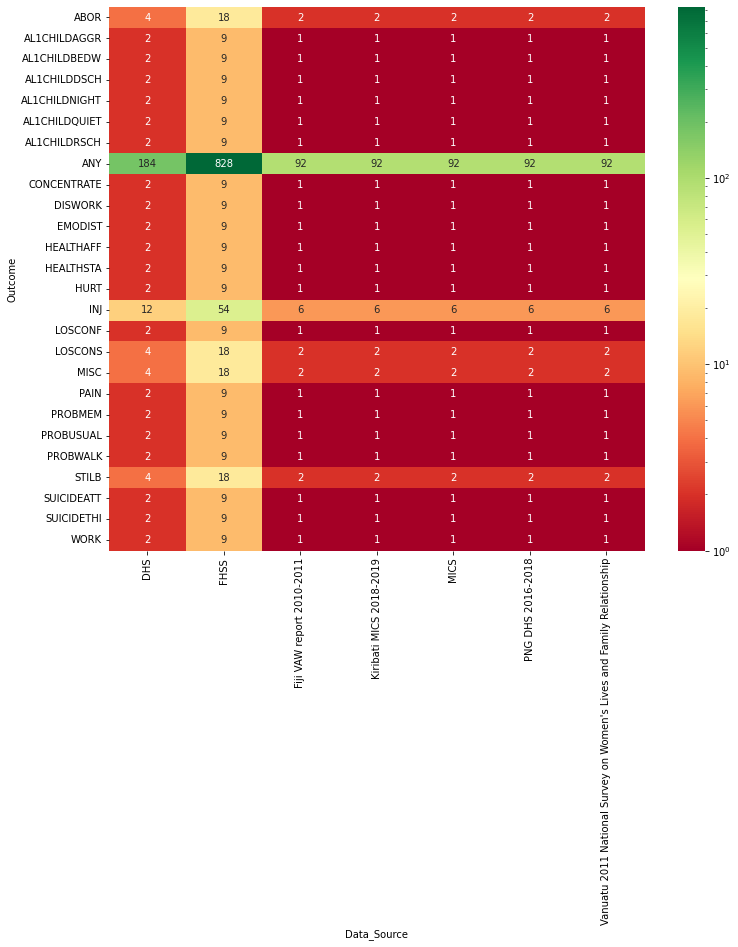

In [187]:
# Investigate the data distributions
myCrosstable = pd.crosstab(vaw_v2['Outcome'], vaw_v2['Data_Source']) # Change the column name to examine

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(myCrosstable,
            annot=True,
            norm=LogNorm(),
            cmap='RdYlGn',
            fmt='d')

Taking some notes

|Features | My Notes
| :--- | :---
|vaw['Country_Code'] | seems ok 
|vaw['Topic'] | Very Bad, Outcome==any and Outcome != Any have no common categories. Or fix with comments or drop 
|vaw['Age'] | One Categorie, but with comments can make more 
|vaw['Condition'] | Seems preety good (If i can make it better with comment, umso besser) 
|vaw['Violence_Type'] | Very Bad, I dont think I can fix It... try with comments 
|vaw['Perpetrator'] | Preety bad 
|vaw['Actuality'] | Could work... 
|vaw['Life_Period'] | Baaaad again 
|vaw['Response'] | Reealy Bad, can't be saved all valuse belong to either Response==Any or Outcome==Any 
|vaw['Help_Reason'] | Same with df['Response'] 
|vaw['Help_Provider'] | Same with df['Response'] 
|vaw['Data_Source'] | Seems good (hope ther is some important information) 
|vaw['Comment'] | Hope to use and save some features 

####  Try to add some information to the dataset through the feature "Comment" 

In [188]:
# check for significant key-words or key-phrases
vaw_v2['Comment'].value_counts()

Women 15-49.                                                                                                     370
Women age 18-64 years.                                                                                           126
Sample women 15-49.                                                                                              125
UN Women: Global database on Violence against women.                                                             124
Sample women aged 15-49.                                                                                         123
Ever married women 15-49.                                                                                        121
Violence committed by husband or anyone else.                                                                      5
Ever married women 15-49. Violence experienced committed by a husband or anyone else.                              2
Sample women aged 15-49. Women 15-49 years experiencing physical

In [189]:
# defining dictioneries with the important key-words and key-phrases
age = {'15-49':['15-49'],
       '18-64':['18-64']}

condition = {'Ever married':['EVPART'],
             'Ever-married':['EVPART'],
             'ever pregnant':['EVPREG'],
             'last child was less than 5 years old':['EVPREG', 'CHI614']}
            
perpetrator = {'husband':['PARTNER'],
               'partner':['PARTNER'],
               'Husband':['PARTNER'],
               'anyone else':['ANY'],
               'any perpetrators':['ANY']}
              
violence_type = {'physical or sexual violence':['PHYSORSEX'],
                 'taken earnings/savings against her will':['CONT_ECON']} 
                
                
outcome = {'Concentration problems':['CONCENTRATE'],
           'Pain or discomfort':['PAIN'],
           'Mobility problem':['PROBWALK', 'PROBUSUAL']}
          
life_per = {'In the past four weeks':['SINCE15']} # if vaw['Age'] == '18-64'

topic = {'physical or sexual violence':['VAW_003', 'VAW_004'], # if vaw['Perpetrator']' == 'PARTNER'
         'husband':['VAW_001'], 
         'partner':['VAW_001'],
         'anyone else':['VAW_007'],
         'Violence experienced from any perpetrators':['VAW_007'],
         'physical or sexual violence':['VAW_008', 'VAW_009'], # if vaw['Perpetrator']' != 'PARTNER' & != 'ANY'
         'Pain or discomfort':['VAW_012'],
         'Mobility problem':['VAW_012'],
         'taken earnings/savings against her will':['VAW_001']}

In [190]:
#coloumns that could be not edit by comments
columns_to_drop = ['Response', 'Help_Reason', 'Help_Provider']

vaw_v2 = vaw_v2.drop(columns_to_drop, axis=1)

## Transformations

### Encodings

#### Greate new columns for Age (Ajustments later)

In [191]:
col_loc = vaw_v2.shape[1]

for column in ['Age_15-49', 'Age_18-64', 'Age_15-64']:
    vaw_v2.insert(col_loc, f'{column}', 0, True)
    
vaw_v2['Age_15-64'] = 1
        
vaw_v2 = vaw_v2.drop('Age', axis=1)

#### One hot Encoding for categorical columns

In [192]:
# columns to encode
columns = ['Country_Code','Topic', 'Condition', 'Violence_Type', 'Perpetrator', 'Actuality', 'Life_Period', 'Data_Source']
prefix = ['Country','Topic','Cndtn','Vio_typ','Prptr','Actual','L_Per','D_S']

for idx, column in enumerate(columns):
    dummies = pd.get_dummies(vaw_v2[column], prefix=prefix[idx]) #Get only the encoded columns (as a DF)
    vaw_v2 = pd.concat([vaw_v2, dummies], axis=1) #Concat the 2 DF's
    vaw_v2 = vaw_v2.drop(column, axis=1) #Drop the original column

vaw_v2.head(10)

,Time,Outcome,Observation_Value,Comment,Age_15-64,Age_18-64,Age_15-49,Country_CK,Country_FJ,Country_FM,Country_KI,Country_MH,Country_NR,Country_PG,Country_PW,Country_SB,Country_TO,Country_TV,Country_VU,Country_WS,Topic_VAW_001,Topic_VAW_002,Topic_VAW_003,Topic_VAW_004,Topic_VAW_005,Topic_VAW_006,Topic_VAW_007,Topic_VAW_008,Topic_VAW_009,Topic_VAW_010,Topic_VAW_011,Topic_VAW_012,Topic_VAW_013,Topic_VAW_014,Topic_VAW_015,Topic_VAW_016,Topic_VAW_017,Topic_VAW_018,Cndtn_ANY,Cndtn_CHI614,Cndtn_EVPART,Cndtn_EVPREG,Cndtn_W4M,Vio_typ_ANY,Vio_typ_CONT_ECON,Vio_typ_CONT_FRIENDS,Vio_typ_CONT_OTHMAN,Vio_typ_CONT_UNFAITH,Vio_typ_CONT_WHERE,Vio_typ_EMO,Vio_typ_EMO_HUM,Vio_typ_EMO_INS,Vio_typ_EMO_SCA,Vio_typ_PHYS,Vio_typ_PHYSORSEX,Vio_typ_PHYS_CHOK,Vio_typ_PHYS_FIST,Vio_typ_PHYS_KICK,Vio_typ_PHYS_MOD,Vio_typ_PHYS_PUSH,Vio_typ_PHYS_SEV,Vio_typ_PHYS_SLAP,Vio_typ_PHYS_WEAP,Vio_typ_SEX,Vio_typ_SEX_AFRAID,Vio_typ_SEX_CHILD,Vio_typ_SEX_DEGRAD,Vio_typ_SEX_FORCE,Prptr_ANY,Prptr_FAMFEM,Prptr_FAMMAL,Prptr_NONPART,Prptr_OTHFEM,Prptr_OTHMAL,Prptr_PARTNER,Actual_ALO12M,Actual_ALOLIFE,Actual_ANY,L_Per_ANY,L_Per_BEFORE15,L_Per_PREGNANCY,L_Per_SINCE15,D_S_DHS,D_S_FHSS,D_S_Fiji VAW report 2010-2011,D_S_Kiribati MICS 2018-2019,D_S_MICS,D_S_PNG DHS 2016-2018,D_S_Vanuatu 2011 National Survey on Women's Lives and Family Relationship
0,2013,ANY,6.2,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1,2013,ANY,9.6,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2013,ANY,26.7,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3,2013,ANY,6.7,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,2013,ANY,30.2,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
5,2013,ANY,9.1,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
6,2013,ANY,33.0,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
7,2013,ANY,4.6,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
8,2013,ANY,13.1,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
9,2013,ANY,8.0,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


#### Fill columns by feature "Comment"

In [193]:
# defining dictioneries with the important key-words and key-phrases
age = {'15-49':['15-49'],
       '18-64':['18-64']}

condition = {'Ever married':['EVPART'],
             'Ever-married':['EVPART'],
             'ever pregnant':['EVPREG'],
             'last child was less than 5 years old':['EVPREG', 'CHI614']}
            
perpetrator = {'husband':['PARTNER'],
               'partner':['PARTNER'],
               'Husband':['PARTNER'],
               'anyone else':['ANY'],
               'any perpetrators':['ANY']}
              
violence_type = {'physical or sexual violence':['PHYSORSEX'],
                 'taken earnings/savings against her will':['CONT_ECON']} 
                
                
outcome = {'Concentration problems':['CONCENTRATE'],
           'Pain or discomfort':['PAIN'],
           'Mobility problem':['PROBWALK', 'PROBUSUAL']}
          
life_per = {'In the past four weeks':['SINCE15']} # if vaw_encoded['Age'] == '18-64'

topic = {'physical or sexual violence':{'partnr':['VAW_003', 'VAW_004'], # if vaw_encoded['Perpetrator']' == 'PARTNER'
                                        'n-partnr':['VAW_008', 'VAW_009']}, # if vaw_encoded['Perpetrator']' != 'PARTNER' & != 'ANY'
         'husband':['VAW_001'], 
         'partner':['VAW_001'],
         'anyone else':['VAW_007'],
         'Violence experienced from any perpetrators':['VAW_007'],
         'Pain or discomfort':['VAW_012'],
         'Mobility problem':['VAW_012'],
         'taken earnings/savings against her will':['VAW_001']}

#### Easy to fill columns

In [194]:
rows = vaw_v2.shape[0]

def fill_cols(col_dict, prexif):
    # iterate through rows
    for row in range(rows):

        # Check if there is an avaliable comment in this row
        if str(vaw_v2['Comment'].iloc[row]) != 'nan':

            # iterate through keywords
            for keyword in col_dict:

                # Check if the keyword exists in the comment
                if keyword in vaw_v2['Comment'].iloc[row]:
                    change_any = True
                    
                    # iterate through columns to be adjust
                    for col in col_dict[keyword]:

                            vaw_v2[f'{prexif}_{col}'].iloc[row] = 1
                            
                            if col == 'ANY':
                                change_any = False
                                
                    if change_any:
                        vaw_v2[f'{prexif}_ANY'].iloc[row] = 0
                    
fill_cols(condition, 'Cndtn')
fill_cols(perpetrator, 'Prptr')
fill_cols(violence_type, 'Vio_typ')

#### Filling feature: "Age"

In [195]:
rows = vaw_v2.shape[0]

for row in range(rows):
    for key_word in age:
        if str(vaw_v2['Comment'].iloc[row]) != 'nan':
            if key_word in vaw_v2['Comment'].iloc[row]:
                vaw_v2[f'Age_{age[key_word][0]}'].iloc[row] = 1
                vaw_v2['Age_15-64'].iloc[row] = 0

#### Filling feature: "Period of Life"

In [196]:
rows = vaw_v2.shape[0]
life_per
for row in range(rows):
    
    if str(vaw_v2['Comment'].iloc[row]) != 'nan':
        
        for keyword in life_per:
        
            if keyword in vaw_v2['Comment'].iloc[row] and vaw_v2['Age_18-64'].iloc[row] == 1:
                
                vaw_v2[f'L_Per_{life_per[keyword][0]}'].iloc[row] = 1
                vaw_v2['L_Per_ANY'].iloc[row] = 0

#### Filling feature: "Perpetrator"

In [197]:
# iterate through rows
for row in range(rows):

    # Check if there is an avaliable comment in this row
    if str(vaw_v2['Comment'].iloc[row]) != 'nan':

        # iterate through keywords
        for keyword in topic:
            go_on = True
            
            # Check if the keyword exists in the comment
            if keyword in vaw_v2['Comment'].iloc[row]:
                
                if keyword == 'physical or sexual violence':
                    
                    if vaw_v2['Prptr_PARTNER'].iloc[row] == 1:
                        cols_dict = topic[keyword]['partnr']
                    
                    elif vaw_v2['Prptr_PARTNER'].iloc[row] != 1 and vaw_v2['Prptr_ANY'].iloc[row] != 1:
                        cols_dict = topic[keyword]['n-partnr']
                        
                    else:
                        go_on = False
                
                else:
                    cols_dict = topic[keyword] 
                     
                # iterate through columns to be adjust
                if go_on:
                    for col in cols_dict:

                            vaw_v2[f'Topic_{col}'].iloc[row] = 1

In [198]:
vaw_v2.head(10)

,Time,Outcome,Observation_Value,Comment,Age_15-64,Age_18-64,Age_15-49,Country_CK,Country_FJ,Country_FM,Country_KI,Country_MH,Country_NR,Country_PG,Country_PW,Country_SB,Country_TO,Country_TV,Country_VU,Country_WS,Topic_VAW_001,Topic_VAW_002,Topic_VAW_003,Topic_VAW_004,Topic_VAW_005,Topic_VAW_006,Topic_VAW_007,Topic_VAW_008,Topic_VAW_009,Topic_VAW_010,Topic_VAW_011,Topic_VAW_012,Topic_VAW_013,Topic_VAW_014,Topic_VAW_015,Topic_VAW_016,Topic_VAW_017,Topic_VAW_018,Cndtn_ANY,Cndtn_CHI614,Cndtn_EVPART,Cndtn_EVPREG,Cndtn_W4M,Vio_typ_ANY,Vio_typ_CONT_ECON,Vio_typ_CONT_FRIENDS,Vio_typ_CONT_OTHMAN,Vio_typ_CONT_UNFAITH,Vio_typ_CONT_WHERE,Vio_typ_EMO,Vio_typ_EMO_HUM,Vio_typ_EMO_INS,Vio_typ_EMO_SCA,Vio_typ_PHYS,Vio_typ_PHYSORSEX,Vio_typ_PHYS_CHOK,Vio_typ_PHYS_FIST,Vio_typ_PHYS_KICK,Vio_typ_PHYS_MOD,Vio_typ_PHYS_PUSH,Vio_typ_PHYS_SEV,Vio_typ_PHYS_SLAP,Vio_typ_PHYS_WEAP,Vio_typ_SEX,Vio_typ_SEX_AFRAID,Vio_typ_SEX_CHILD,Vio_typ_SEX_DEGRAD,Vio_typ_SEX_FORCE,Prptr_ANY,Prptr_FAMFEM,Prptr_FAMMAL,Prptr_NONPART,Prptr_OTHFEM,Prptr_OTHMAL,Prptr_PARTNER,Actual_ALO12M,Actual_ALOLIFE,Actual_ANY,L_Per_ANY,L_Per_BEFORE15,L_Per_PREGNANCY,L_Per_SINCE15,D_S_DHS,D_S_FHSS,D_S_Fiji VAW report 2010-2011,D_S_Kiribati MICS 2018-2019,D_S_MICS,D_S_PNG DHS 2016-2018,D_S_Vanuatu 2011 National Survey on Women's Lives and Family Relationship
0,2013,ANY,6.2,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1,2013,ANY,9.6,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2013,ANY,26.7,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3,2013,ANY,6.7,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,2013,ANY,30.2,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
5,2013,ANY,9.1,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
6,2013,ANY,33.0,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
7,2013,ANY,4.6,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
8,2013,ANY,13.1,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
9,2013,ANY,8.0,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


#### Check if the comments did realy held (hint almost nothing new...)

In [199]:
# New (encoded columns)
age_cols = ['Age_15-64', 'Age_18-64', 'Age_15-49']

coutry_cols = ['Country_CK','Country_FJ','Country_FM','Country_KI',
               'Country_MH','Country_NR','Country_PG','Country_PW',
               'Country_SB','Country_TO','Country_TV','Country_VU',
               'Country_WS']

topic_cols = ['Topic_VAW_001','Topic_VAW_002','Topic_VAW_003','Topic_VAW_004',
              'Topic_VAW_005','Topic_VAW_006','Topic_VAW_007','Topic_VAW_008',
              'Topic_VAW_009','Topic_VAW_010','Topic_VAW_011','Topic_VAW_012',
              'Topic_VAW_013','Topic_VAW_014','Topic_VAW_015','Topic_VAW_016',
              'Topic_VAW_017','Topic_VAW_018']

condition_cols = ['Cndtn_ANY','Cndtn_CHI614','Cndtn_EVPART',
                  'Cndtn_EVPREG','Cndtn_W4M']

violence_type_cols = ['Vio_typ_ANY','Vio_typ_CONT_ECON','Vio_typ_CONT_FRIENDS',
                      'Vio_typ_CONT_OTHMAN','Vio_typ_CONT_UNFAITH','Vio_typ_CONT_WHERE',
                      'Vio_typ_EMO','Vio_typ_EMO_HUM','Vio_typ_EMO_INS','Vio_typ_EMO_SCA',
                      'Vio_typ_PHYS','Vio_typ_PHYSORSEX','Vio_typ_PHYS_CHOK',
                      'Vio_typ_PHYS_FIST','Vio_typ_PHYS_KICK','Vio_typ_PHYS_MOD',
                      'Vio_typ_PHYS_PUSH','Vio_typ_PHYS_SEV','Vio_typ_PHYS_SLAP',
                      'Vio_typ_PHYS_WEAP','Vio_typ_SEX','Vio_typ_SEX_AFRAID',
                      'Vio_typ_SEX_CHILD','Vio_typ_SEX_DEGRAD','Vio_typ_SEX_FORCE']

perpetrator_cols = ['Prptr_ANY','Prptr_FAMFEM','Prptr_FAMMAL','Prptr_NONPART',
                    'Prptr_OTHFEM','Prptr_OTHMAL','Prptr_PARTNER']

actuality_cols = ['Actual_ALO12M','Actual_ALOLIFE','Actual_ANY']

life_period_cols = ['L_Per_ANY','L_Per_BEFORE15','L_Per_PREGNANCY','L_Per_SINCE15']

data_source_cols = ['D_S_DHS','D_S_FHSS','D_S_Fiji VAW report 2010-2011',
                    'D_S_Kiribati MICS 2018-2019','D_S_MICS','D_S_PNG DHS 2016-2018',
                    "D_S_Vanuatu 2011 National Survey on Women's Lives and Family Relationship"]

In [200]:
def heatmaps_side_by_side(df1, df2, title, cmap):

    fig, (ax1, ax2) =plt.subplots(nrows=1,ncols=2, figsize=(18,13))
    fig.suptitle(title)
    
    sns.heatmap(df1,
                annot=True,
                norm=LogNorm(),
                cmap=cmap,
                fmt='.0f',
                ax=ax1
               )
    sns.heatmap(df2,
                annot=True,
                norm=LogNorm(),
                cmap=cmap,
                fmt='.0f',
                ax=ax2
               )
    plt.show()

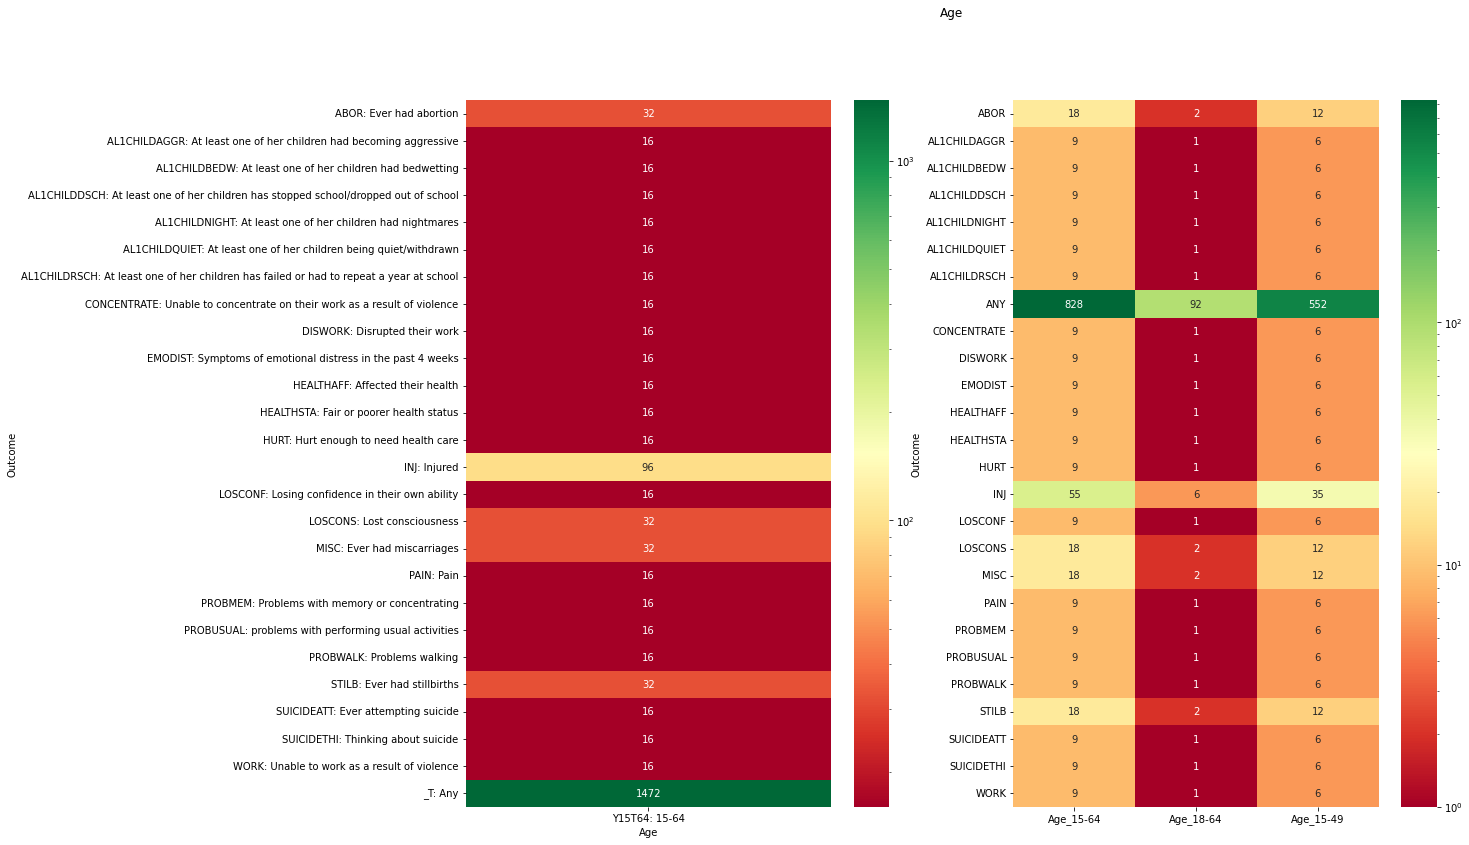

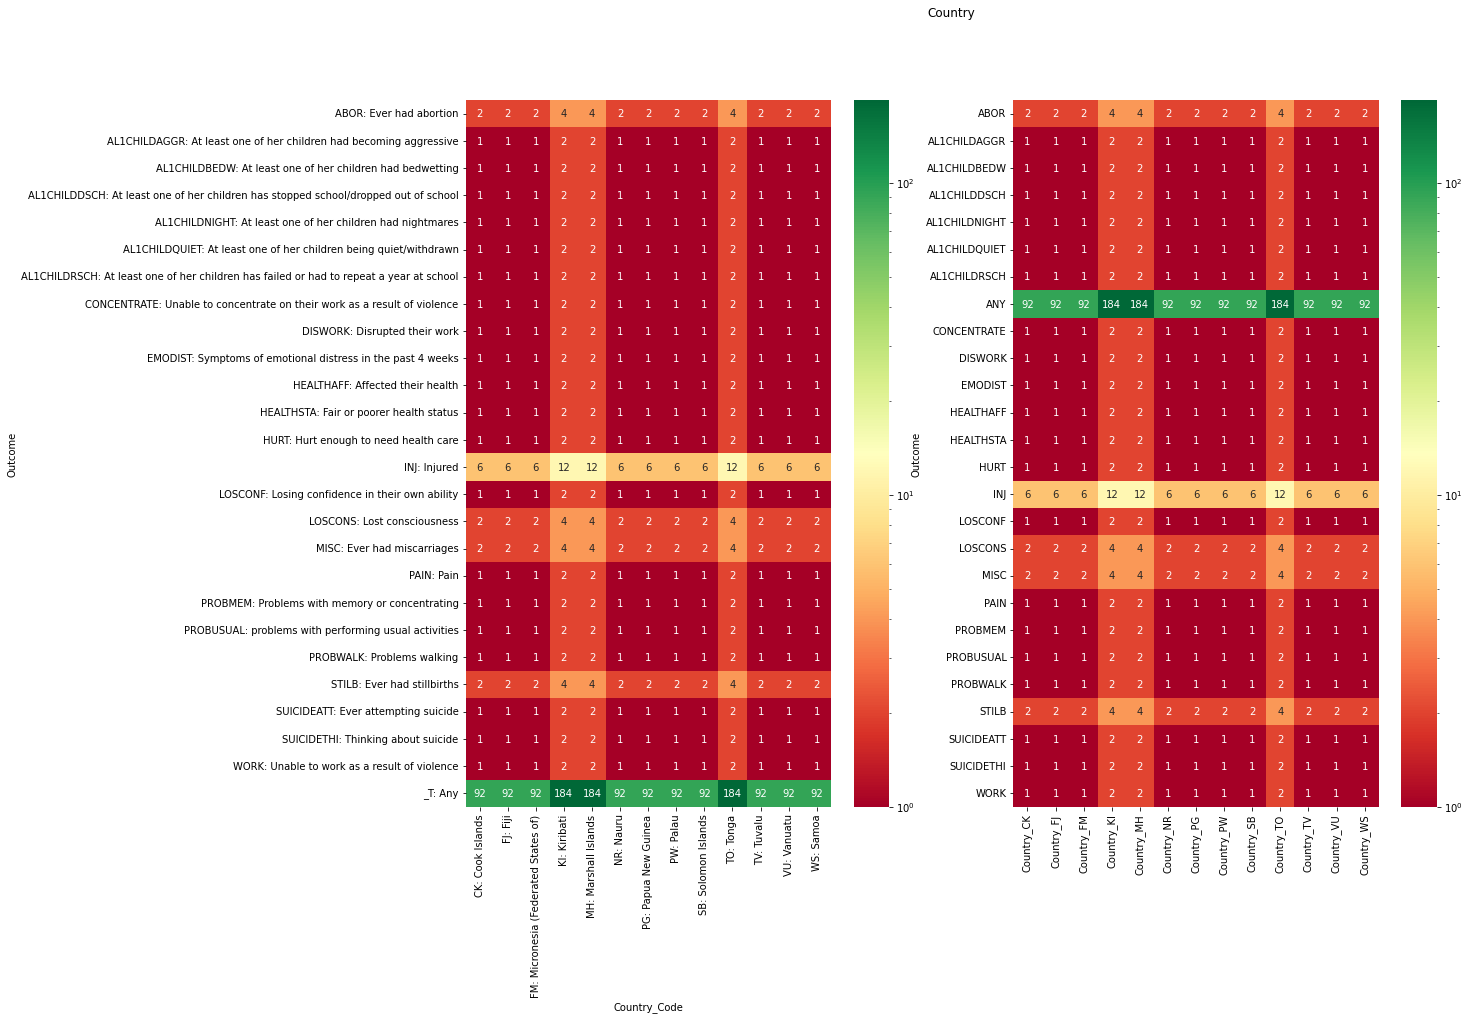

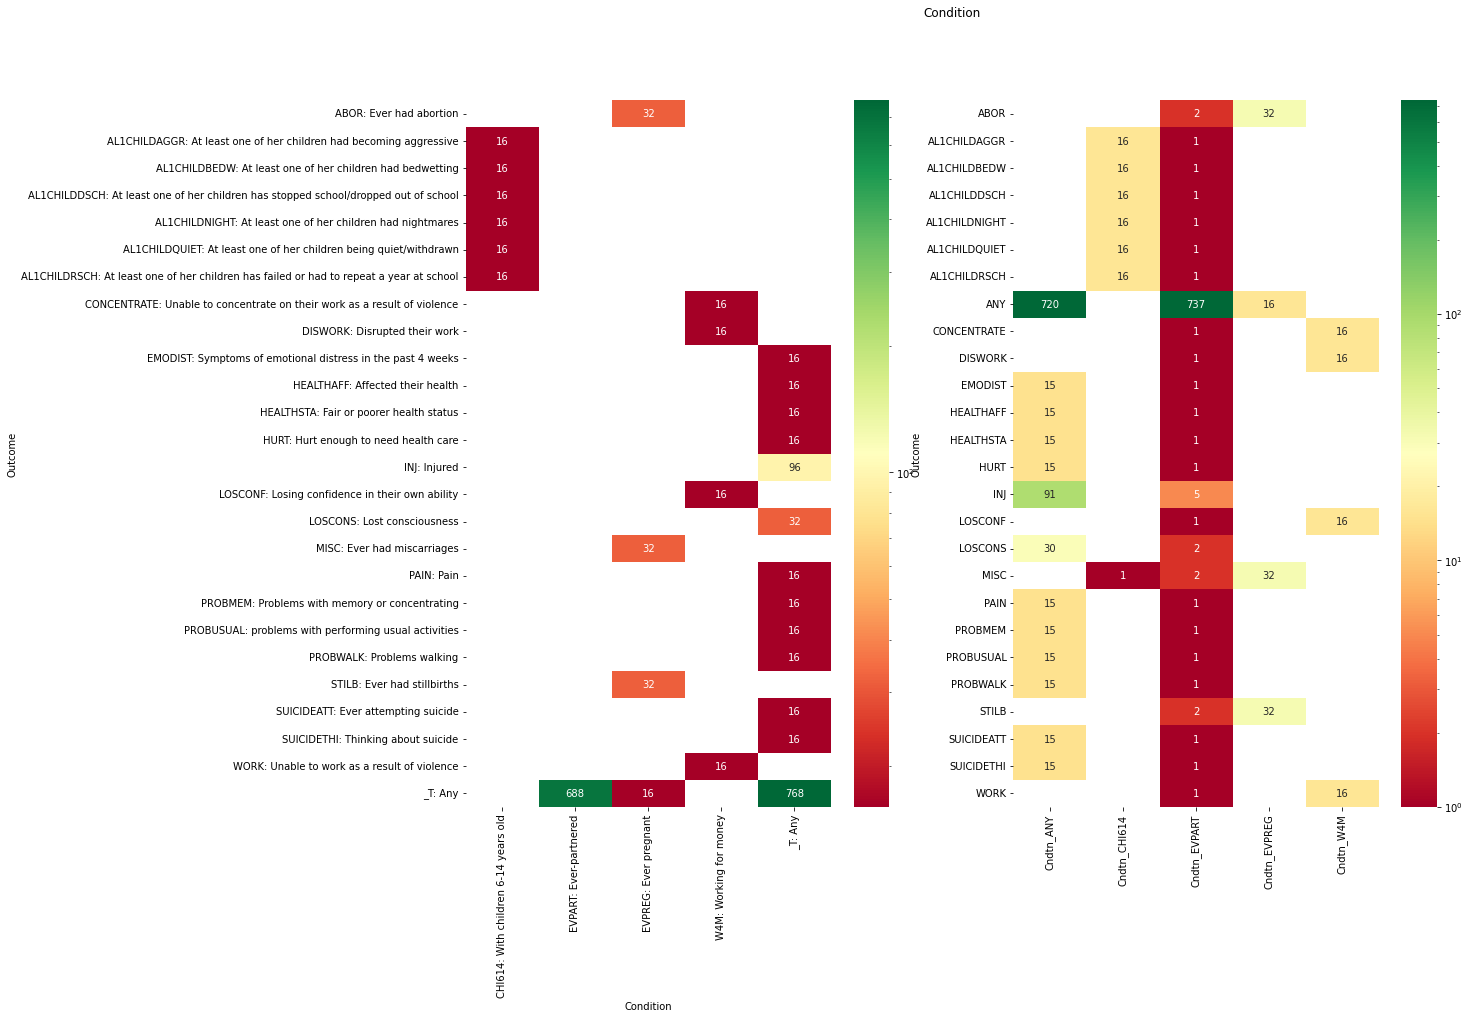

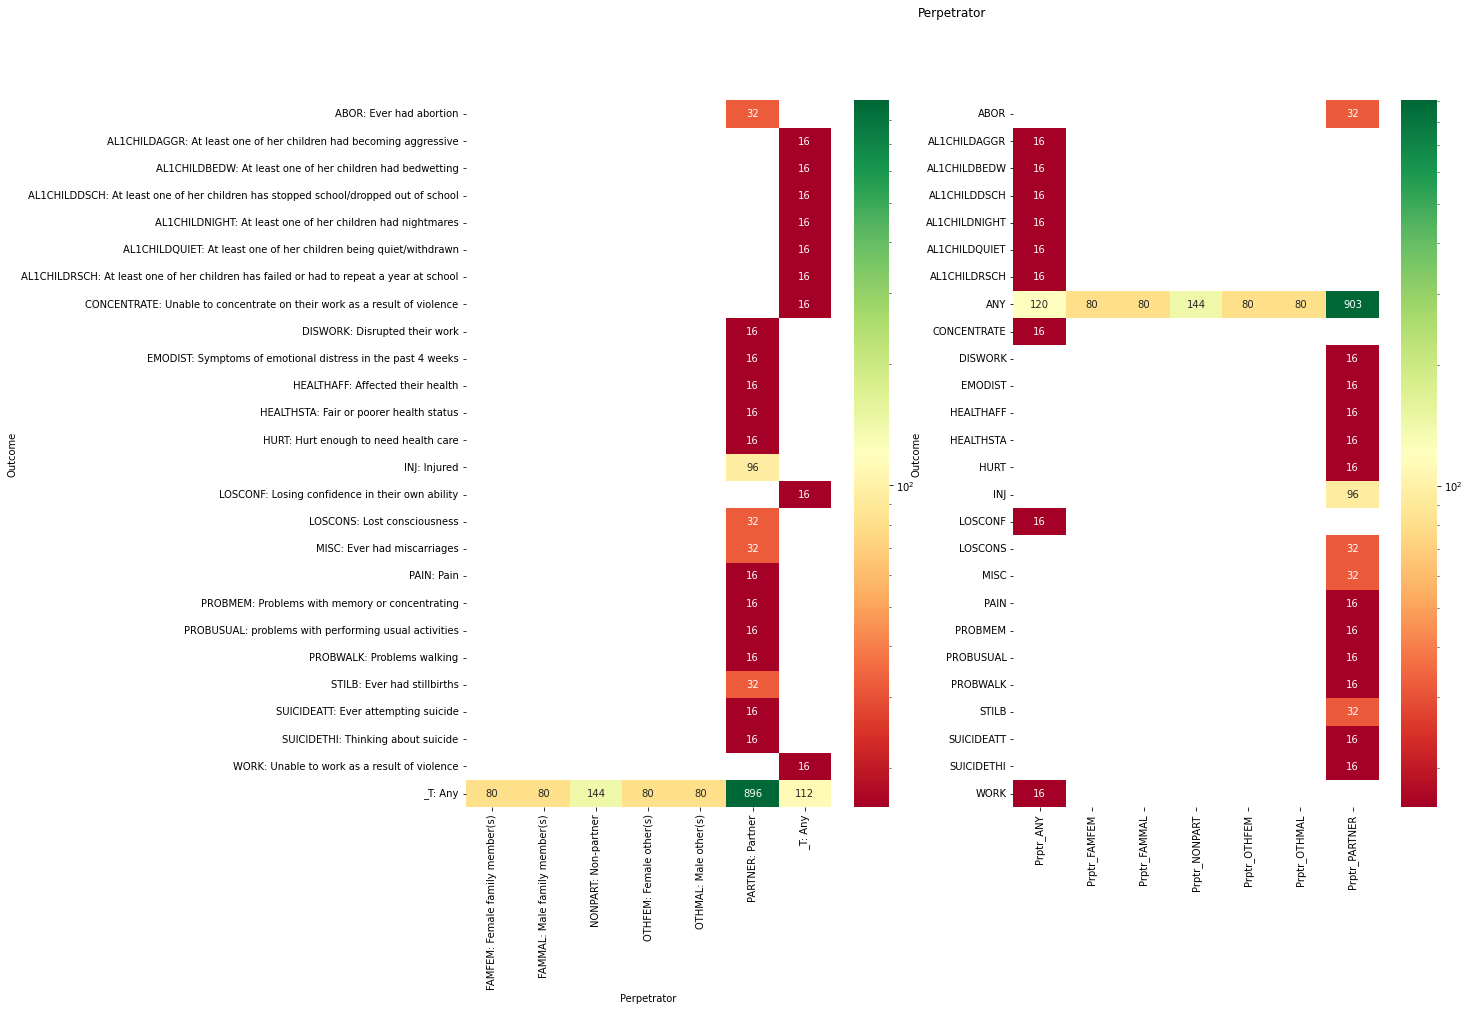

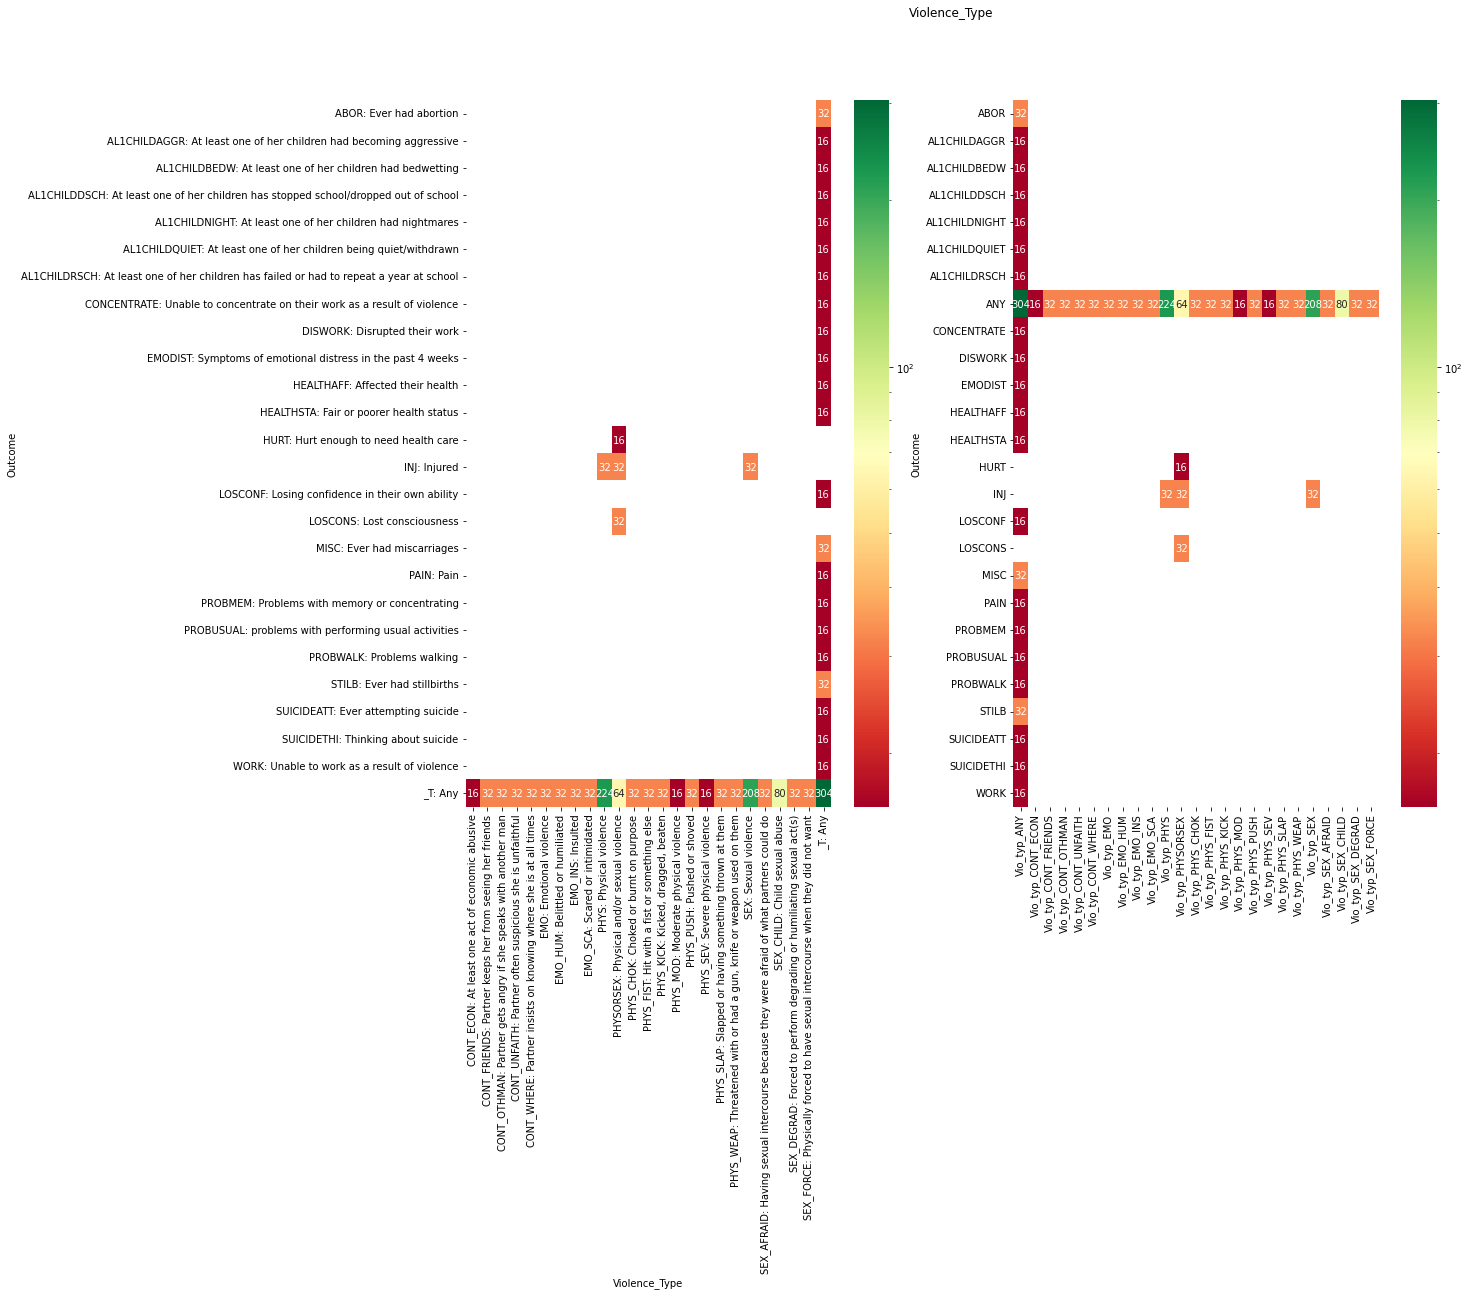

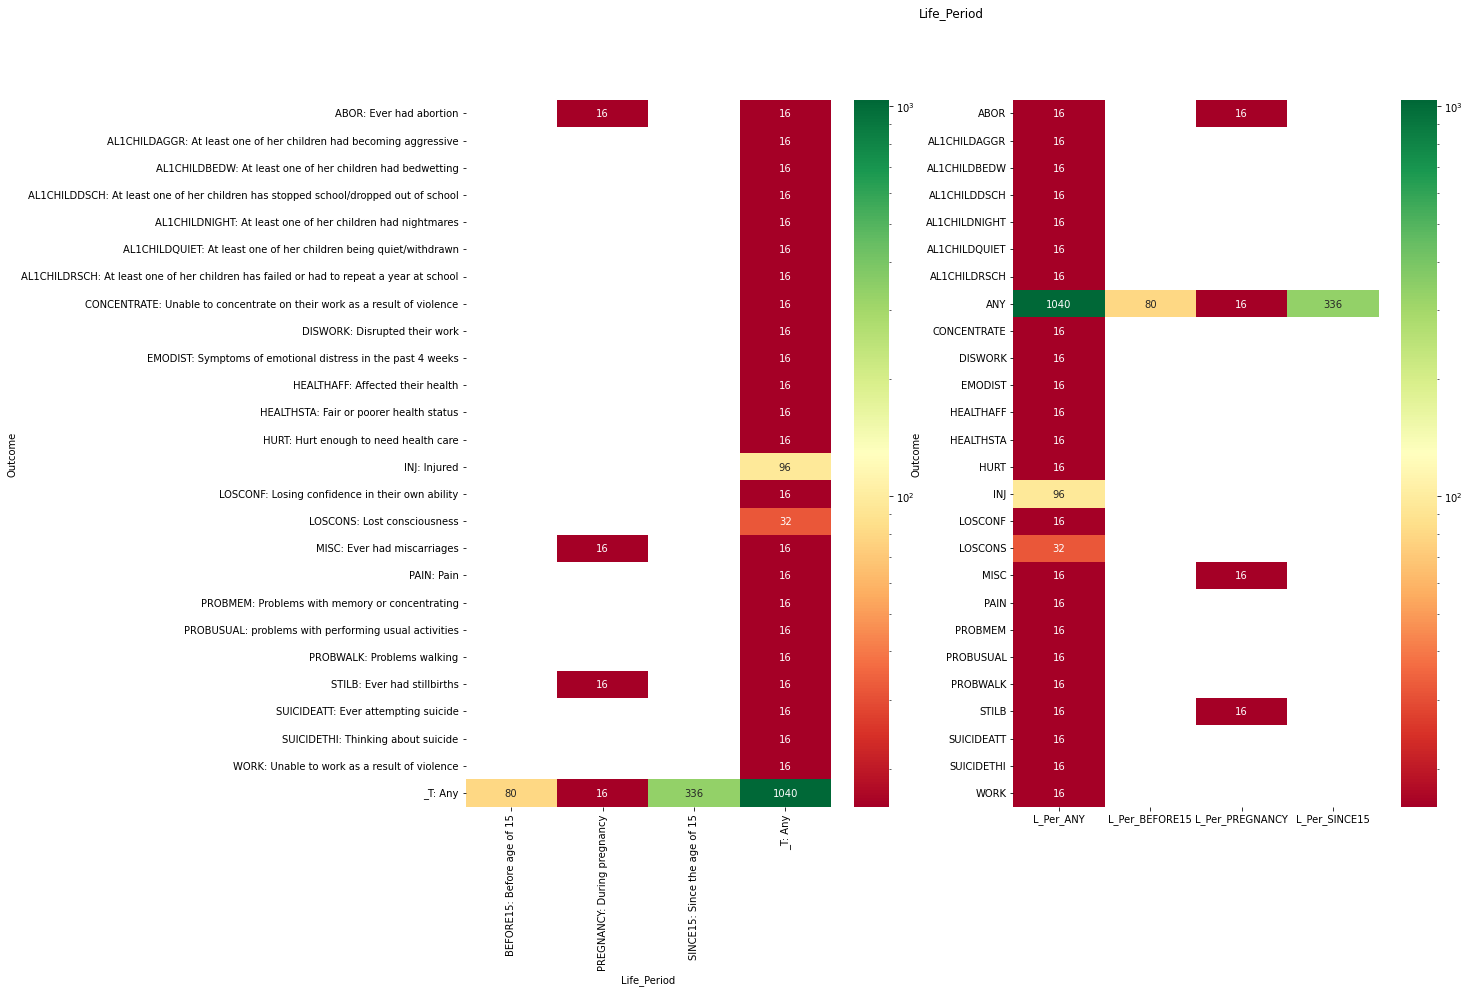

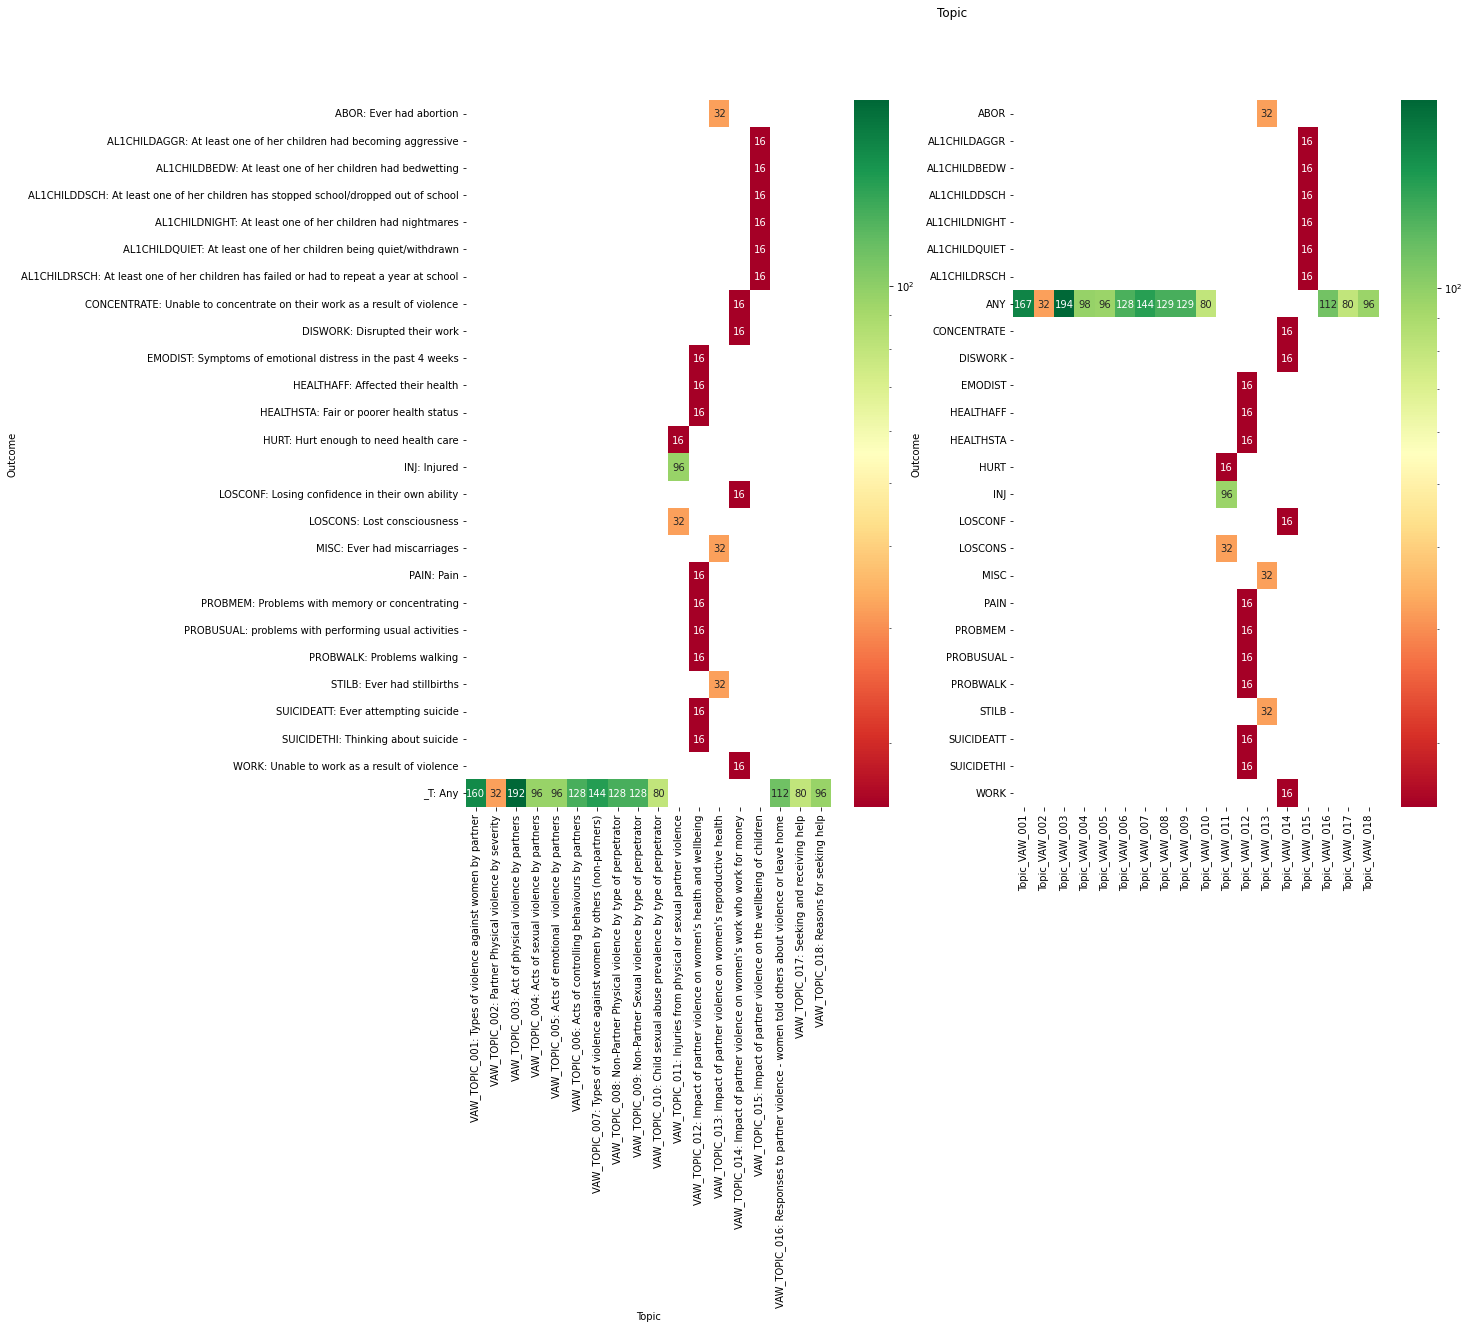

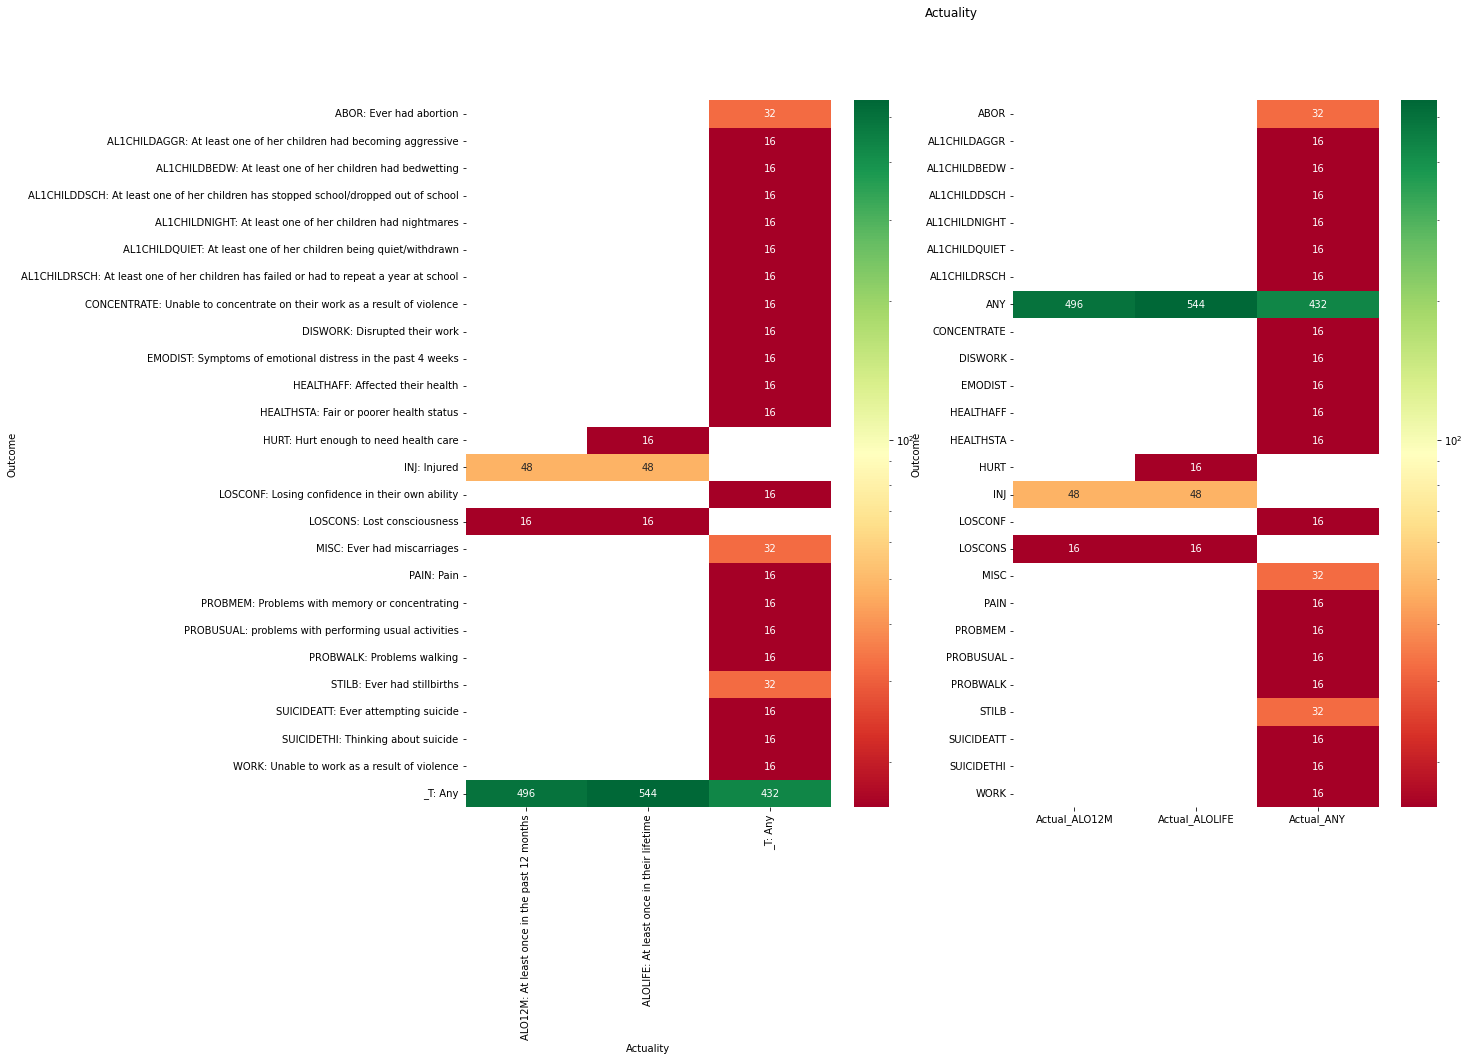

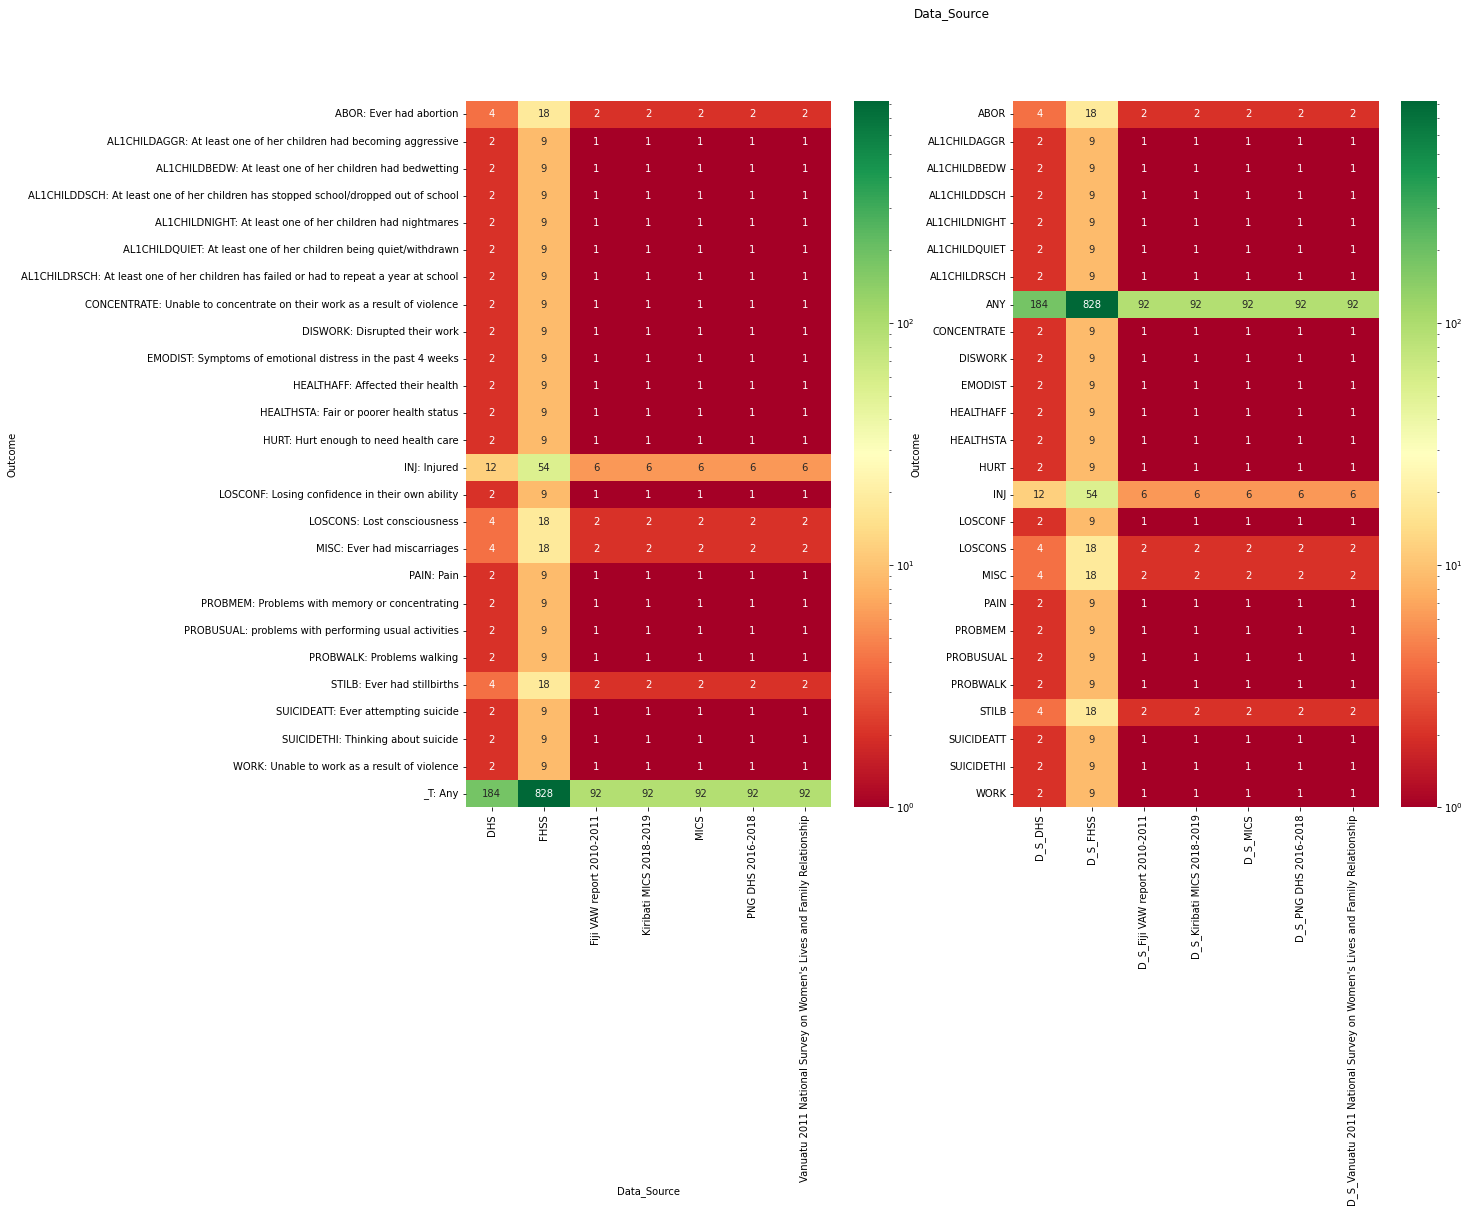

In [201]:
old_cols = ['Age','Country_Code','Condition','Perpetrator',
            'Violence_Type','Life_Period','Topic',
            'Actuality','Data_Source']

encod_cols = [age_cols, coutry_cols, condition_cols, perpetrator_cols, 
              violence_type_cols, life_period_cols, topic_cols, 
              actuality_cols, data_source_cols]

titles = ['Age', 'Country', 'Condition','Perpetrator',
          'Violence_Type','Life_Period','Topic',
          'Actuality','Data_Source']

for idx in range(len(encod_cols)):
    
    # Crowwtabulation Matrix
    tab1 = pd.crosstab(vaw_v1['Outcome'], vaw_v1[old_cols[idx]])
    
    # Multi-column frequency count
    tab2 = vaw_v2.groupby(['Outcome'])[encod_cols[idx]].sum()
    
    heatmaps_side_by_side(tab1, tab2, titles[idx], 'RdYlGn')

#### Encode feature: "Outcome"

In [202]:
outcome_encoder = {'ANY':0,
                   'HEALTHAFF':1,
                   'AL1CHILDQUIET':2,
                   'AL1CHILDAGGR':3,
                   'AL1CHILDBEDW':4,
                   'AL1CHILDNIGHT':5,
                   'AL1CHILDRSCH':6,
                   'AL1CHILDDSCH':7,
                   'DISWORK':8,
                   'SUICIDEATT':9,
                   'ABOR':10,
                   'MISC':11,
                   'STILB':12,
                   'HEALTHSTA':13,
                   'HURT':14,
                   'INJ':15,
                   'LOSCONF':16,
                   'LOSCONS':17,
                   'PAIN':18,
                   'PROBWALK':19,
                   'PROBMEM':20,
                   'PROBUSUAL':21,
                   'EMODIST':22,
                   'SUICIDETHI':23,
                   'CONCENTRATE':24,
                   'WORK':25}

def outcome_encod(string):
    
    return outcome_encoder[string]
    
vaw_v2['Outcome'] = vaw_v2['Outcome'].apply(outcome_encod)

### Remove_Highly_Correlated_Features

In [203]:
# Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = vaw_v2.corr(method='spearman')

<Figure size 1296x720 with 0 Axes>

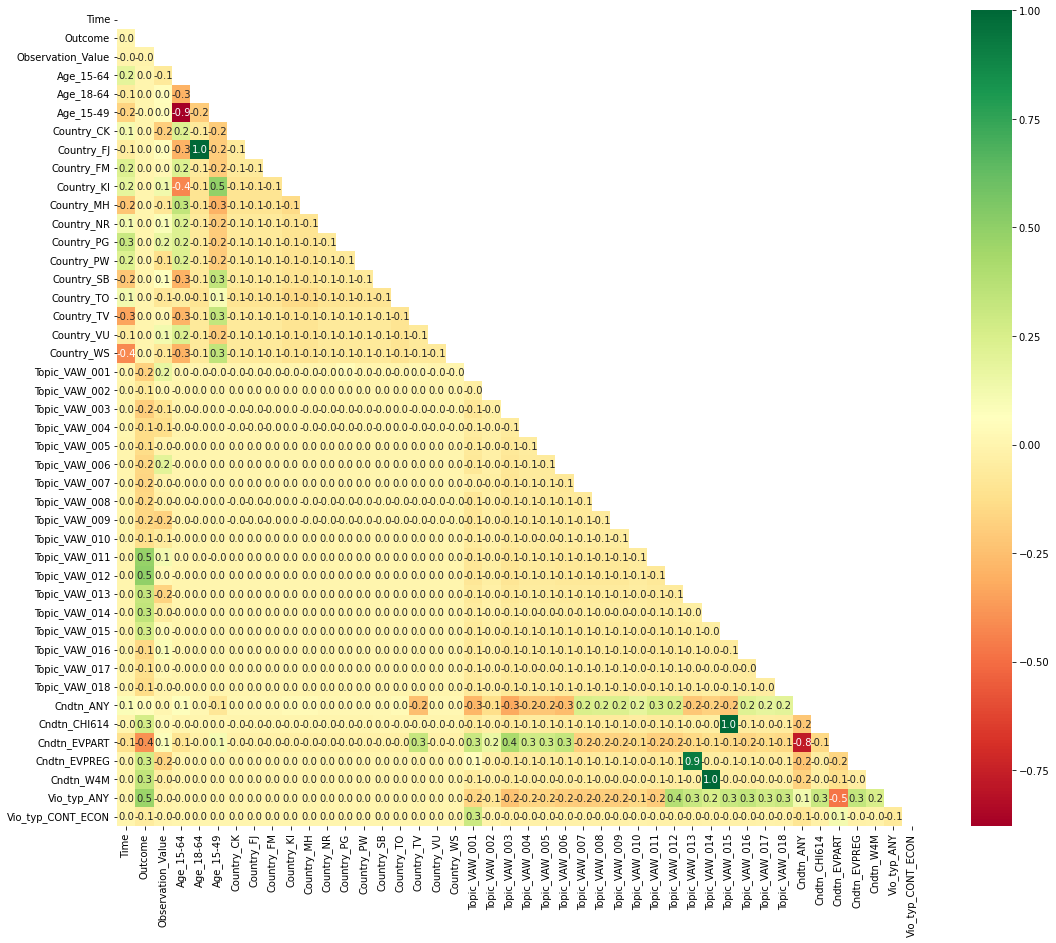

In [204]:
mid = int(cor.shape[0]/2)

subCor = cor.iloc[0:mid,0:mid]

mask = np.zeros_like(subCor)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(subCor,
            mask=mask,
            annot=True,
            cmap='RdYlGn',
            fmt=".1f"
           )
plt.show()

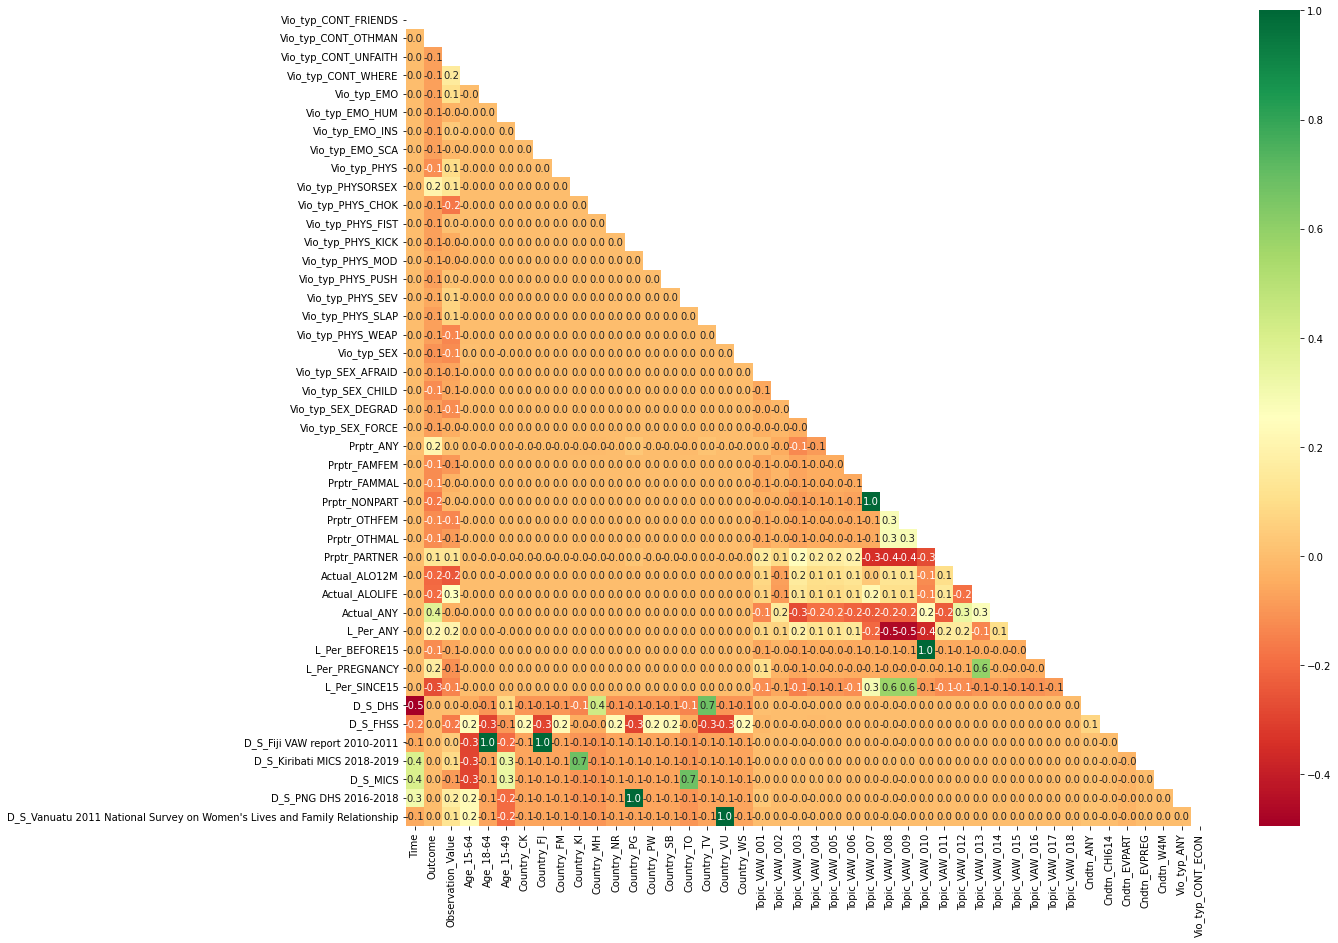

In [205]:
mid = int(cor.shape[0]/2)

subCor = cor.iloc[mid:,0:mid]

mask = np.zeros_like(subCor)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(subCor,
            mask=mask,
            annot=True,
            cmap='RdYlGn',
            fmt=".1f"
           )
plt.show()

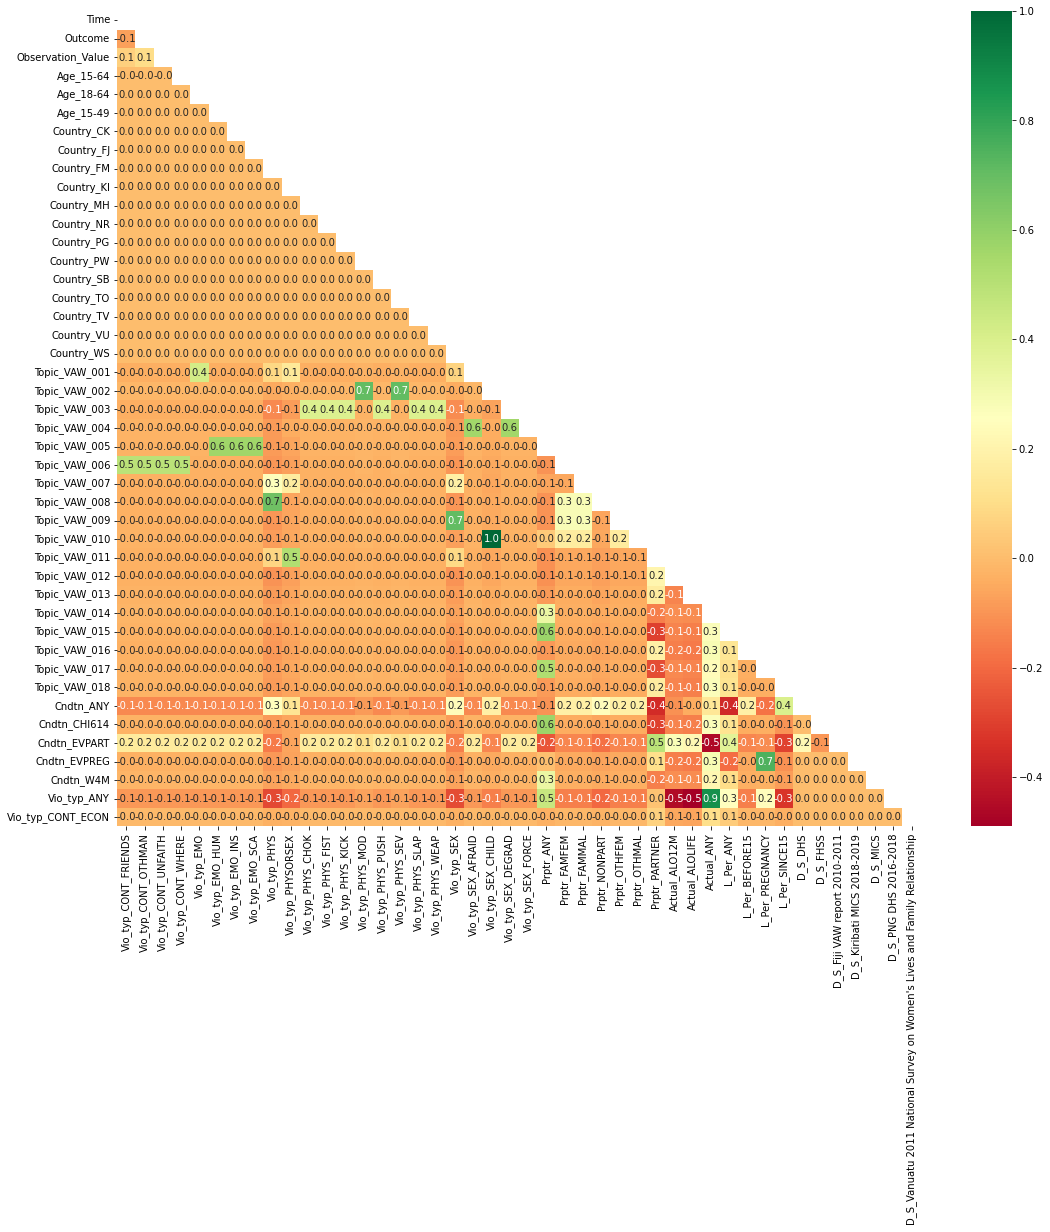

In [206]:
mid = int(cor.shape[0]/2)

subCor = cor.iloc[0:mid,mid:]

mask = np.zeros_like(subCor)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(subCor,
            mask=mask,
            annot=True,
            cmap='RdYlGn',
            fmt=".1f"
           )
plt.show()

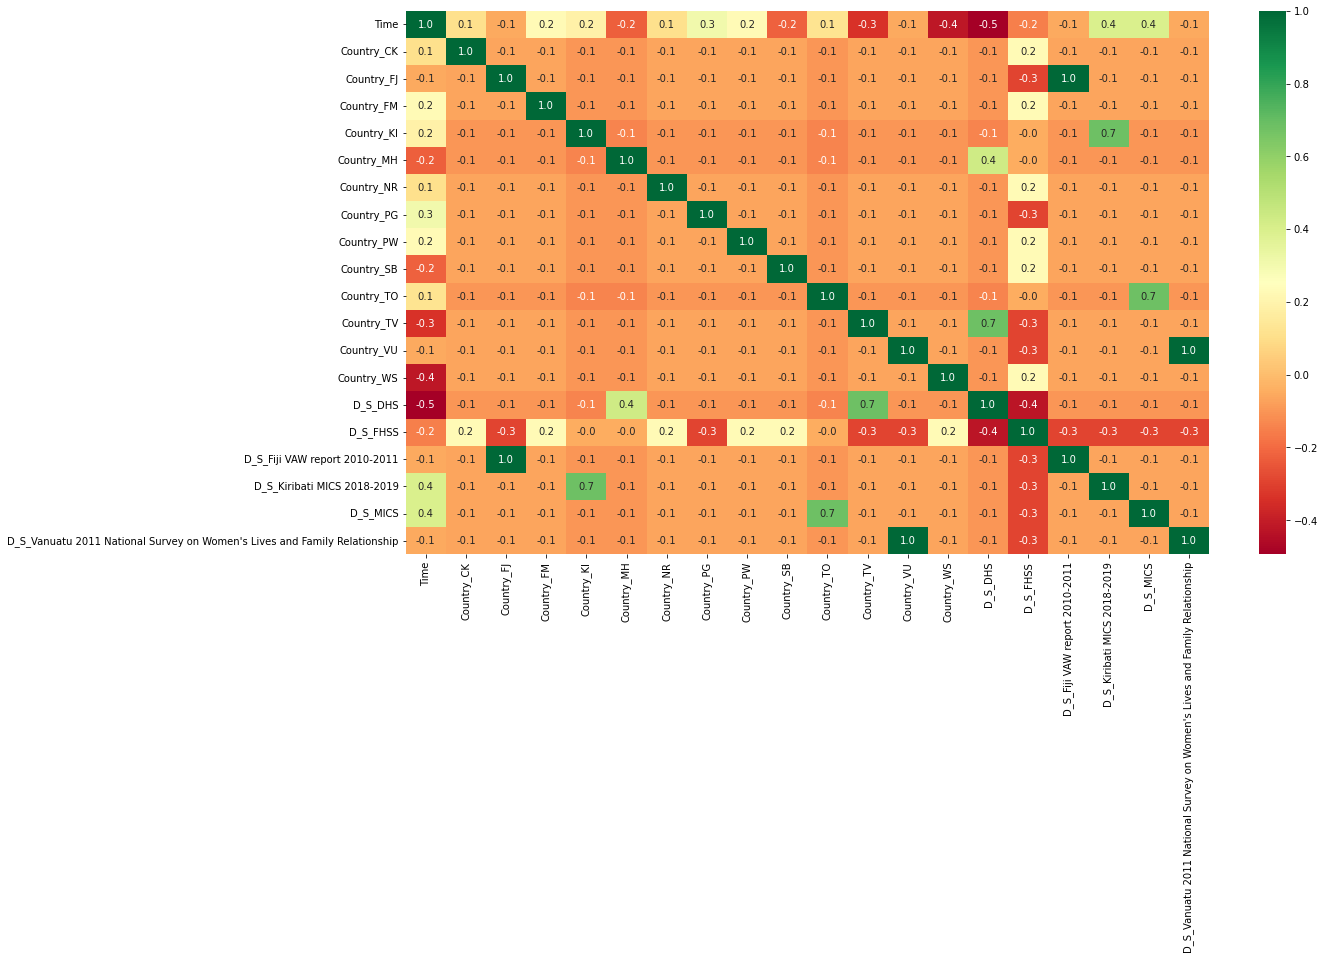

In [207]:
# Take a closer look at some features
cols_to_check = ['Time','Country_CK','Country_FJ','Country_FM','Country_KI',
                 'Country_MH','Country_NR','Country_PG','Country_PW',
                 'Country_SB','Country_TO','Country_TV','Country_VU',
                 'Country_WS','D_S_DHS','D_S_FHSS',
                 'D_S_Fiji VAW report 2010-2011',
                 'D_S_Kiribati MICS 2018-2019','D_S_MICS',
                 "D_S_Vanuatu 2011 National Survey on Women's Lives and Family Relationship"]

#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = (vaw_v2[cols_to_check]).corr(method='spearman')
sns.heatmap(cor,
            annot=True,
            cmap='RdYlGn',
            fmt=".1f"
           )
plt.show()

In [208]:
# After the correlation cheks we drop the following columns
cols_to_drop = ['Age_15-64','Age_18-64','Topic_VAW_007','Topic_VAW_010',
                'Topic_VAW_013','Topic_VAW_014','Topic_VAW_015','Cndtn_ANY','Vio_typ_ANY',
                'Prptr_ANY','Actual_ANY','L_Per_ANY','D_S_DHS','D_S_FHSS',
                'D_S_Fiji VAW report 2010-2011','D_S_Kiribati MICS 2018-2019',
                'D_S_MICS','D_S_PNG DHS 2016-2018',
                "D_S_Vanuatu 2011 National Survey on Women's Lives and Family Relationship",
                'Comment']

vaw_v3 = vaw_v2.drop(cols_to_drop, axis=1)

In [209]:
vaw_v3.columns # final columns (69 in total)

Index(['Time', 'Outcome', 'Observation_Value', 'Age_15-49', 'Country_CK',
       'Country_FJ', 'Country_FM', 'Country_KI', 'Country_MH', 'Country_NR',
       'Country_PG', 'Country_PW', 'Country_SB', 'Country_TO', 'Country_TV',
       'Country_VU', 'Country_WS', 'Topic_VAW_001', 'Topic_VAW_002',
       'Topic_VAW_003', 'Topic_VAW_004', 'Topic_VAW_005', 'Topic_VAW_006',
       'Topic_VAW_008', 'Topic_VAW_009', 'Topic_VAW_011', 'Topic_VAW_012',
       'Topic_VAW_016', 'Topic_VAW_017', 'Topic_VAW_018', 'Cndtn_CHI614',
       'Cndtn_EVPART', 'Cndtn_EVPREG', 'Cndtn_W4M', 'Vio_typ_CONT_ECON',
       'Vio_typ_CONT_FRIENDS', 'Vio_typ_CONT_OTHMAN', 'Vio_typ_CONT_UNFAITH',
       'Vio_typ_CONT_WHERE', 'Vio_typ_EMO', 'Vio_typ_EMO_HUM',
       'Vio_typ_EMO_INS', 'Vio_typ_EMO_SCA', 'Vio_typ_PHYS',
       'Vio_typ_PHYSORSEX', 'Vio_typ_PHYS_CHOK', 'Vio_typ_PHYS_FIST',
       'Vio_typ_PHYS_KICK', 'Vio_typ_PHYS_MOD', 'Vio_typ_PHYS_PUSH',
       'Vio_typ_PHYS_SEV', 'Vio_typ_PHYS_SLAP', 'Vio_typ_PHYS_WEA

In [210]:
vaw_v3.head(10)

,Time,Outcome,Observation_Value,Age_15-49,Country_CK,Country_FJ,Country_FM,Country_KI,Country_MH,Country_NR,Country_PG,Country_PW,Country_SB,Country_TO,Country_TV,Country_VU,Country_WS,Topic_VAW_001,Topic_VAW_002,Topic_VAW_003,Topic_VAW_004,Topic_VAW_005,Topic_VAW_006,Topic_VAW_008,Topic_VAW_009,Topic_VAW_011,Topic_VAW_012,Topic_VAW_016,Topic_VAW_017,Topic_VAW_018,Cndtn_CHI614,Cndtn_EVPART,Cndtn_EVPREG,Cndtn_W4M,Vio_typ_CONT_ECON,Vio_typ_CONT_FRIENDS,Vio_typ_CONT_OTHMAN,Vio_typ_CONT_UNFAITH,Vio_typ_CONT_WHERE,Vio_typ_EMO,Vio_typ_EMO_HUM,Vio_typ_EMO_INS,Vio_typ_EMO_SCA,Vio_typ_PHYS,Vio_typ_PHYSORSEX,Vio_typ_PHYS_CHOK,Vio_typ_PHYS_FIST,Vio_typ_PHYS_KICK,Vio_typ_PHYS_MOD,Vio_typ_PHYS_PUSH,Vio_typ_PHYS_SEV,Vio_typ_PHYS_SLAP,Vio_typ_PHYS_WEAP,Vio_typ_SEX,Vio_typ_SEX_AFRAID,Vio_typ_SEX_CHILD,Vio_typ_SEX_DEGRAD,Vio_typ_SEX_FORCE,Prptr_FAMFEM,Prptr_FAMMAL,Prptr_NONPART,Prptr_OTHFEM,Prptr_OTHMAL,Prptr_PARTNER,Actual_ALO12M,Actual_ALOLIFE,L_Per_BEFORE15,L_Per_PREGNANCY,L_Per_SINCE15
0,2013,0,6.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2013,0,9.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,2013,0,26.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,2013,0,6.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,2013,0,30.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
5,2013,0,9.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
6,2013,0,33.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7,2013,0,4.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8,2013,0,13.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9,2013,0,8.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Split_Datasets

In [211]:
# split sets X(train, test, predic) + y(train, test, predic)

In [212]:
prediction_set = vaw_v3.loc[vaw_v3['Outcome'] == outcome_encoder['ANY']]
train_set = vaw_v3.loc[vaw_v3['Outcome'] != outcome_encoder['ANY']]

X_pred = prediction_set.drop('Outcome', axis=1)
y_pred = prediction_set['Outcome']

X = train_set.drop('Outcome', axis=1)
y = train_set['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#shape of dataset
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))
print('X_pred: ' + str(X_pred.shape))
print('y_pred: ' + str(y_pred.shape))

X_train: (435, 68)
y_train: (435,)
X_test:  (109, 68)
y_test:  (109,)
X_pred: (1472, 68)
y_pred: (1472,)


### Remove_Outliers

<AxesSubplot:xlabel='Observation_Value'>

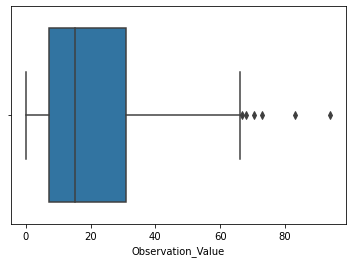

In [213]:
import seaborn as sns
sns.boxplot(x=X_train['Observation_Value'])

In [214]:
Q1 = X_train['Observation_Value'].quantile(0.25)
Q3 = X_train['Observation_Value'].quantile(0.75)
IQR = Q3 - Q1

print(f'Range: {IQR}')
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')

Range: 23.65
Q1: 7.275
Q3: 30.925


In [215]:
lower_bound = Q1 - (1.5 * IQR) 
upper_bound = Q3 + (1.5 * IQR)

print(f'Bounds: [{lower_bound},{upper_bound}]')
print(f'Bounds Range: {upper_bound-lower_bound}')

Bounds: [-28.199999999999996,66.39999999999999]
Bounds Range: 94.6


#### Locate the rows with outliers

In [216]:
# outlier rows indexies
outliers_rows = (X_train['Observation_Value'].index[(X_train['Observation_Value'] < lower_bound) |(X_train['Observation_Value'] > upper_bound)]).tolist()
print(f'There are {len(outliers_rows)} outliers:')
print(outliers_rows)

There are 6 outliers:
[1720, 1866, 1865, 1551, 1089, 1344]


In [217]:
# drop the outliers
X_train = X_train.drop(outliers_rows, axis=0)
y_train = y_train.drop(outliers_rows, axis=0)

In [218]:
# Check...
print(X_train.shape[0] == y_train.shape[0])
print(X_train.shape[0])

True
429


<AxesSubplot:xlabel='Observation_Value'>

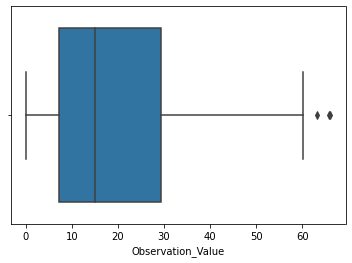

In [219]:
sns.boxplot(x=X_train['Observation_Value']) # seems better

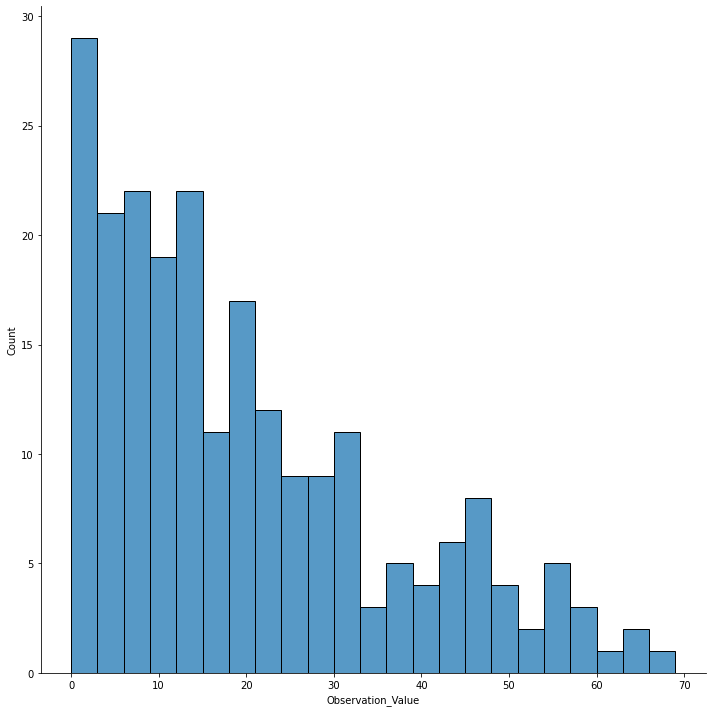

In [220]:
sns.displot(X_train, x='Observation_Value', binwidth=3, height=10)

### Impute

In [221]:
# define imputer
imp = IterativeImputer(max_iter=10, random_state=0)

In [222]:
# Fit and transform on train set
imputed_array = imp.fit_transform(X_train)

In [223]:
# Convert to Dataframe again
X_train = pd.DataFrame(imputed_array, index=X_train.index, columns=X_train.columns)

In [224]:
# transform test and predict set

In [225]:
# test set
imputed_array = imp.transform(X_test)
X_test = pd.DataFrame(imputed_array, index=X_test.index, columns=X_test.columns)

# predict set
imputed_array = imp.transform(X_pred)
X_pred = pd.DataFrame(imputed_array, index=X_pred.index, columns=X_pred.columns)

### Scale 

In [226]:
# define min max scalers
scaler = MinMaxScaler()

# Fit and transform training data
scaled_array = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_array, index=X_train.index, columns=X_train.columns)

In [227]:
# transform test and predict set

In [228]:
# test set
scaled_array = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_array, index=X_test.index, columns=X_test.columns)

# predict set
scaled_array = scaler.transform(X_pred)
X_pred = pd.DataFrame(scaled_array, index=X_pred.index, columns=X_pred.columns)

### P.C.A.

In [229]:
# define PCA
pca = PCA()
pca = pca.fit(X_train)

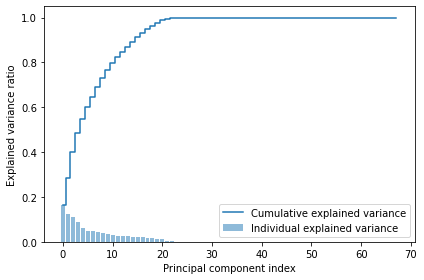

In [230]:
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [231]:
total_var = 0

for i, var in enumerate(exp_var_pca):
    total_var += var
    if total_var > .99:
        print(f'For {i} components there is over 99% of information kept!')
        break

For 21 components there is over 99% of information kept!


In [232]:
pca = PCA(n_components=21)

In [233]:
# Fit and transform training data

In [234]:
pca_array = pca.fit_transform(X_train)
X_train = pd.DataFrame(pca_array, index=X_train.index)

In [235]:
# transform test and predict set

In [236]:
# test set
pca_array = pca.transform(X_test)
X_test = pd.DataFrame(pca_array, index=X_test.index)

# predict set
pca_array = pca.transform(X_pred)
X_pred = pd.DataFrame(pca_array, index=X_pred.index)

### Data_Mining

#### Logistic_Regression

In [237]:
%%time

# Define the multinomial logistic regression model
logisticRegressor = LogisticRegression(multi_class='multinomial',
                                       random_state=96,
                                       class_weight='balanced')

# Define model parameters for the grid
param_grid = {'penalty':['l1', 'l2'],
              'C': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]}

# Define the (10-Fold) Cross Validation Grid Search
search = GridSearchCV(estimator=logisticRegressor,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=10)

# Lets search
search.fit(X_train,
           y_train)

print(search.best_params_)
print(search.best_score_)

logisticRegressor = search.best_estimator_

{'C': 0.6, 'penalty': 'l2'}
0.22159468438538205
Wall time: 708 ms


### k-Nearest_Neighbors

In [238]:
%%time

# Define the multinomial logistic regression model
kNearestNeighbors = KNeighborsClassifier(metric='minkowski')

# Define model parameters for the grid
param_grid = {'n_neighbors':list(range(5,35)), # sqrt(435)~20 => [20-15,20+15] = [5,35]
              'weights':['distance','uniform'],
              'p':[1,2,3,4,5,6,7,8,9,10]}

# Define the (10-Fold) Cross Validation Grid Search
search = GridSearchCV(estimator=kNearestNeighbors,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=10)

# Lets search
search.fit(X_train,
           y_train)

print(search.best_params_)
print(search.best_score_)

kNearestNeighbors = search.best_estimator_

{'n_neighbors': 32, 'p': 6, 'weights': 'uniform'}
0.3030454042081949
Wall time: 1min


### Disicion_Tree

In [239]:
%%time

# Define the multinomial logistic regression model
decisionTree = DecisionTreeClassifier(random_state=96,
                                      class_weight='balanced')

# Define model parameters for the grid
param_grid = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':[2,3,4,5,6,7,8],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[2,3,4,5,6]}

# Define the (10-Fold) Cross Validation Grid Search
search = GridSearchCV(estimator=decisionTree,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=10)

# Lets search
search.fit(X_train,
           y_train)

print(search.best_params_)
print(search.best_score_)

decisionTree = search.best_estimator_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
0.3218715393133998
Wall time: 21.9 s


### Support_Vector_Machine

In [240]:
%%time

# Define the multinomial logistic regression model
supportVectorMachine = SVC(random_state=96,
                           class_weight='balanced')

# Define model parameters for the grid
param_grid = [{'kernel':['linear'],
               'C':[0.125, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]},
              {'kernel':['poly'],
               'degree':[2,3,4,5,6,7,8],
               'coef0':[0,1],
               'gamma':[0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.5, 1, 2, 4],
               'C':[0.125, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]},
              {'kernel':['rbf'],
               'gamma':[0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.5, 1, 2, 4],
               'C':[0.125, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]},
              {'kernel':['sigmoid'],
               'coef0':[0,1],
               'gamma':[0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.5, 1, 2, 4],
               'C':[0.125, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]},]

# Define the (10-Fold) Cross Validation Grid Search
search = GridSearchCV(estimator=supportVectorMachine,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=10)

# Lets search
search.fit(X_train,
           y_train)

print(search.best_params_)
print(search.best_score_)

supportVectorMachine = search.best_estimator_

{'C': 0.125, 'kernel': 'linear'}
0.33322259136212623
Wall time: 6min 22s


### Random_Forest

In [241]:
%%time

# Define the multinomial logistic regression model
randomForest = RandomForestClassifier(random_state=96,
                                      class_weight='balanced')

# Define model parameters for the grid
param_grid = {'n_estimators':[5,10,15,20,25,30,35,40],
              'criterion':['gini','entropy'],
              'max_depth':[3,4,5,6,7,8],
              'min_samples_split':[2,3,4,5],
              'min_samples_leaf':[1,2,3]}

# Define the (10-Fold) Cross Validation Grid Search
search = GridSearchCV(estimator=randomForest,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=10)

# Lets search
search.fit(X_train,
           y_train)

print(search.best_params_)
print(search.best_score_)

randomForest = search.best_estimator_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}
0.28211517165005534
Wall time: 7min 34s


### XGBoosting

In [242]:
%%time

# Define the multinomial logistic regression model
xGBoost = XGBClassifier(random_state=96,
                        class_weight='balanced')

# Define model parameters for the grid
param_grid = {'n_estimators':[125,130,135,140,145,150,155]}

# Define the (10-Fold) Cross Validation Grid Search
search = GridSearchCV(estimator=xGBoost,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=10)

# Lets search
search.fit(X_train,
           y_train)

print(search.best_params_)
print(search.best_score_)

xGBoost = search.best_estimator_

[20:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:56:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly p

[20:56:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:56:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly p

[20:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly p

[20:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:56:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly p

[20:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly p

[20:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly p

## Evaluation-Interpretation

In [243]:
def evaluation_func(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    
    y_hat = model.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test,y_hat)
    precision = metrics.precision_score(y_test,y_hat,average='macro')
    recall = metrics.recall_score(y_test,y_hat,average='macro')
    f1 = metrics.f1_score(y_test,y_hat,average='macro')
    
    return [accuracy,precision,recall,f1]

In [244]:
models = [logisticRegressor,
          kNearestNeighbors,
          decisionTree,
          supportVectorMachine,
          randomForest,
          xGBoost]

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model in models:
    # calculate scores
    [acc,pre,rec,f1] = evaluation_func(model, X_train, X_test, y_train, y_test)
    # append to correct lists
    accuracy_scores.append(acc)
    precision_scores.append(pre)
    recall_scores.append(rec)
    f1_scores.append(f1)

[20:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:57:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


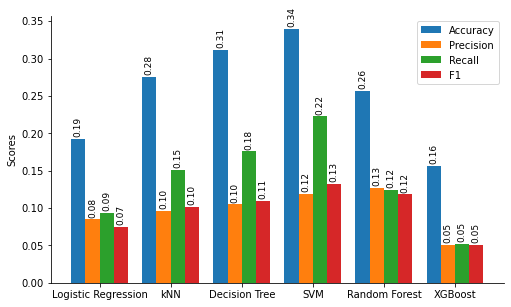

<Figure size 432x288 with 0 Axes>

In [245]:
labels = ['Logistic Regression', 'kNN', 'Decision Tree', 'SVM', 'Random Forest', 'XGBoost']
x = np.arange(len(labels))*2.5  # the label locations
width = 0.50  # the width of the bars

# Plot
fig, ax = plt.subplots()

# Form group bars
rects1 = ax.bar(x - 0.75, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.25, precision_scores, width, label='Precision')
rects3 = ax.bar(x + 0.25, recall_scores, width, label='Recall')
rects4 = ax.bar(x + 0.75, f1_scores, width, label='F1')

# Add some text for labels and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Define bar labels properties
ax.bar_label(rects1, fmt='%.2f', fontsize=9, rotation=90, padding=2)
ax.bar_label(rects2, fmt='%.2f', fontsize=9, rotation=90, padding=2)
ax.bar_label(rects3, fmt='%.2f', fontsize=9, rotation=90, padding=2)
ax.bar_label(rects4, fmt='%.2f', fontsize=9, rotation=90, padding=2)

fig.tight_layout(rect=(0,0,1.2,1.1))
sns.despine()
plt.show()

plt.savefig('Scores_by_Algorythm.jpg')

## Prediction

In [246]:
X_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-0.095146,-0.270775,-0.160796,0.056499,0.263191,0.094090,0.193086,0.202750,0.450894,-0.162408,-0.019386,-0.189745,0.203501,-0.014376,0.328980,0.594006,-0.500987,0.458466,-0.144457,0.144544,-0.133649
1,0.184818,-0.178934,-0.254737,0.034532,0.331010,0.116268,0.194603,-0.474799,0.634516,-0.238699,0.059973,-0.154528,0.179162,-0.017794,0.309899,0.595497,-0.511303,0.511923,-0.148456,0.084257,-0.133387
2,0.237574,-0.115207,-0.200532,-0.011499,0.130076,-0.009226,0.228233,0.881630,0.304834,-0.129532,0.102924,-0.195364,0.180656,-0.004536,0.356172,0.546696,-0.459488,0.420419,-0.159465,0.086078,-0.159865
3,0.285659,-0.150339,-0.289820,0.029470,0.353184,0.111596,0.173367,-0.434884,0.688644,-0.191000,0.428473,-0.128052,0.172569,-0.030816,0.113693,0.345776,-0.362756,1.135812,-0.271234,0.084436,-0.036880
4,0.345141,-0.075935,-0.225586,-0.029478,0.132346,-0.027542,0.216382,0.928776,0.366435,-0.107082,0.489098,-0.160765,0.157516,-0.016043,0.160051,0.284551,-0.303923,1.043480,-0.284147,0.077171,-0.083043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,-0.049534,0.163366,0.560462,0.155557,0.536468,0.171218,-0.005066,-0.043865,-0.171883,0.555886,0.059725,0.391102,-0.119554,-0.015795,0.044403,-0.442672,-0.457955,-0.061588,0.066864,0.179926,-0.149922
2012,-0.060819,0.145451,0.543632,0.177232,0.569866,0.194113,-0.020814,-0.056000,-0.184423,0.598255,0.030067,0.377471,-0.091788,-0.018338,0.044259,-0.421826,-0.469732,-0.060198,0.070058,0.195173,-0.116890
2013,-0.054619,0.155293,0.552878,0.165324,0.551518,0.181535,-0.012163,-0.049333,-0.177534,0.574979,0.046361,0.384960,-0.107042,-0.016941,0.044338,-0.433278,-0.463262,-0.060962,0.068303,0.186797,-0.135037
2014,-0.064917,0.138945,0.537521,0.185104,0.581995,0.202427,-0.026533,-0.060406,-0.188976,0.613642,0.019297,0.372522,-0.081705,-0.019262,0.044207,-0.414255,-0.474009,-0.059694,0.071219,0.200710,-0.104895


In [247]:
supportVectorMachine.fit(X_train, y_train)

y_hat = model.predict(X_pred)
y_hat = pd.Series(y_hat, name='Outcome', index=X_pred.index) # Convert to pd.Series with correct index
y_hat

0       22
1       22
2       14
3        9
4       14
        ..
2011    23
2012    23
2013    23
2014    23
2015    23
Name: Outcome, Length: 1472, dtype: int64

### Merge_All_Three_SubDatasets_Back_to_One

In [248]:
# Concat horisontaly
vaw_train = pd.concat([X_train, y_train], axis=1)
vaw_test = pd.concat([X_test, y_test], axis=1)
vaw_pred = pd.concat([X_pred, y_hat], axis=1)

# Shape of dataset
print('vaw_train: ' + str(vaw_train.shape))
print('vaw_test: ' + str(vaw_test.shape))
print('vaw_pred:  '  + str(vaw_pred.shape))

vaw_train: (429, 22)
vaw_test: (109, 22)
vaw_pred:  (1472, 22)


In [249]:
# Concat with respect to index (verticaly)
vaw_v4 = pd.concat([vaw_train, vaw_test, vaw_pred], axis=0).sort_index()

# Change the col names (P.Comp = Principal Component)
column_names = []

for i in range(21):
    column_names.append(f'P.Comp_{(i+1):02d}')
    
column_names.append('Outcome')

vaw_v4.columns = column_names

# Final Dataset
vaw_v4

,P.Comp_01,P.Comp_02,P.Comp_03,P.Comp_04,P.Comp_05,P.Comp_06,P.Comp_07,P.Comp_08,P.Comp_09,P.Comp_10,P.Comp_11,P.Comp_12,P.Comp_13,P.Comp_14,P.Comp_15,P.Comp_16,P.Comp_17,P.Comp_18,P.Comp_19,P.Comp_20,P.Comp_21,Outcome
0,-0.095146,-0.270775,-0.160796,0.056499,0.263191,0.094090,0.193086,0.202750,0.450894,-0.162408,-0.019386,-0.189745,0.203501,-0.014376,0.328980,0.594006,-0.500987,0.458466,-0.144457,0.144544,-0.133649,22
1,0.184818,-0.178934,-0.254737,0.034532,0.331010,0.116268,0.194603,-0.474799,0.634516,-0.238699,0.059973,-0.154528,0.179162,-0.017794,0.309899,0.595497,-0.511303,0.511923,-0.148456,0.084257,-0.133387,22
2,0.237574,-0.115207,-0.200532,-0.011499,0.130076,-0.009226,0.228233,0.881630,0.304834,-0.129532,0.102924,-0.195364,0.180656,-0.004536,0.356172,0.546696,-0.459488,0.420419,-0.159465,0.086078,-0.159865,14
3,0.285659,-0.150339,-0.289820,0.029470,0.353184,0.111596,0.173367,-0.434884,0.688644,-0.191000,0.428473,-0.128052,0.172569,-0.030816,0.113693,0.345776,-0.362756,1.135812,-0.271234,0.084436,-0.036880,9
4,0.345141,-0.075935,-0.225586,-0.029478,0.132346,-0.027542,0.216382,0.928776,0.366435,-0.107082,0.489098,-0.160765,0.157516,-0.016043,0.160051,0.284551,-0.303923,1.043480,-0.284147,0.077171,-0.083043,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,-0.049534,0.163366,0.560462,0.155557,0.536468,0.171218,-0.005066,-0.043865,-0.171883,0.555886,0.059725,0.391102,-0.119554,-0.015795,0.044403,-0.442672,-0.457955,-0.061588,0.066864,0.179926,-0.149922,23
2012,-0.060819,0.145451,0.543632,0.177232,0.569866,0.194113,-0.020814,-0.056000,-0.184423,0.598255,0.030067,0.377471,-0.091788,-0.018338,0.044259,-0.421826,-0.469732,-0.060198,0.070058,0.195173,-0.116890,23
2013,-0.054619,0.155293,0.552878,0.165324,0.551518,0.181535,-0.012163,-0.049333,-0.177534,0.574979,0.046361,0.384960,-0.107042,-0.016941,0.044338,-0.433278,-0.463262,-0.060962,0.068303,0.186797,-0.135037,23
2014,-0.064917,0.138945,0.537521,0.185104,0.581995,0.202427,-0.026533,-0.060406,-0.188976,0.613642,0.019297,0.372522,-0.081705,-0.019262,0.044207,-0.414255,-0.474009,-0.059694,0.071219,0.200710,-0.104895,23


### Save_New_Dataset_as_.csv

In [250]:
vaw_v4.to_csv('New_VAW.csv')